In [1]:
# Data manipulation
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Classifiers
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Neural Network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# Data Import
ds=pd.read_csv('C:/Users/user/OneDrive/Desktop/Kaggle/breast/data.csv')

In [3]:
ds

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
# First column is not needed
ds = ds.drop(ds.columns[0], axis=1)

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [6]:
#Last column is not needed
ds = ds.drop(ds.columns[31], axis=1)

In [7]:
ds

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [8]:
ds.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
# Checking if there are any missing values
ds.isnull().values.any()

False

In [10]:
# Data division: categorical and numerical data lists
cat_features=['diagnosis']
num_features_means=ds.columns[1:10].tolist()
num_features_se=ds.columns[11:20].tolist()
num_features_worst=ds.columns[21:30].tolist()
num_features_lists=[num_features_means,num_features_se,num_features_worst]

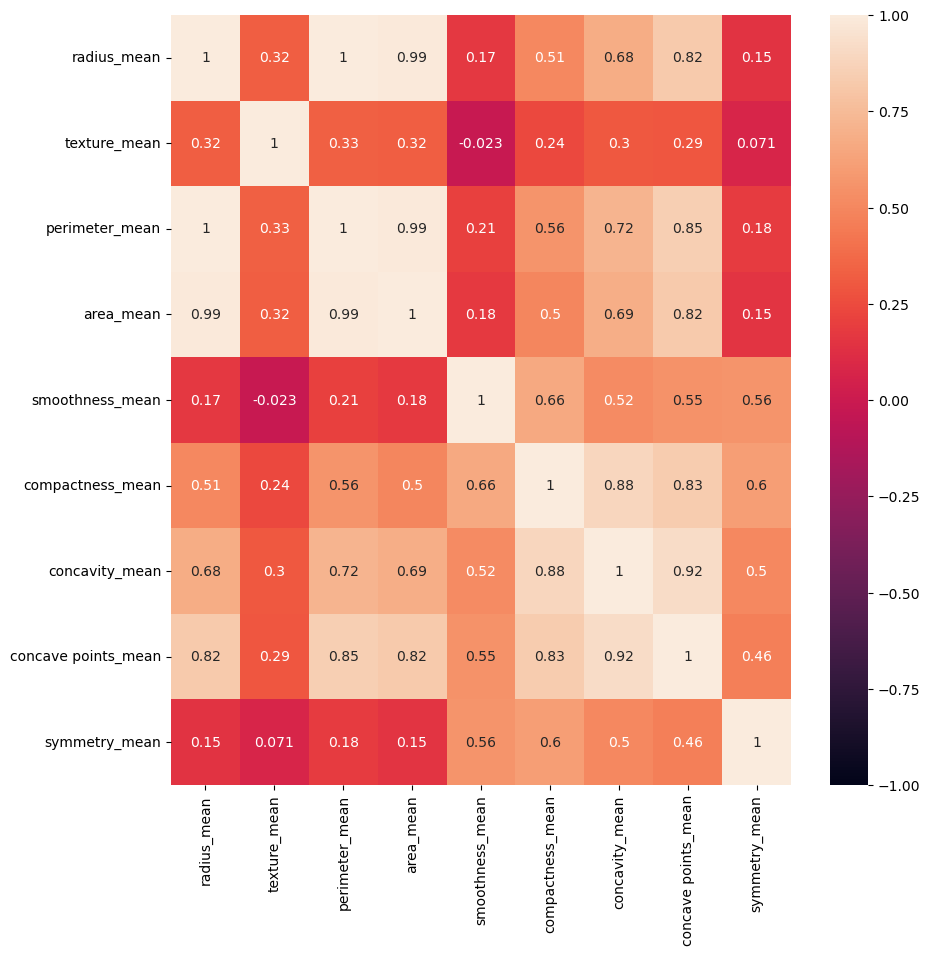

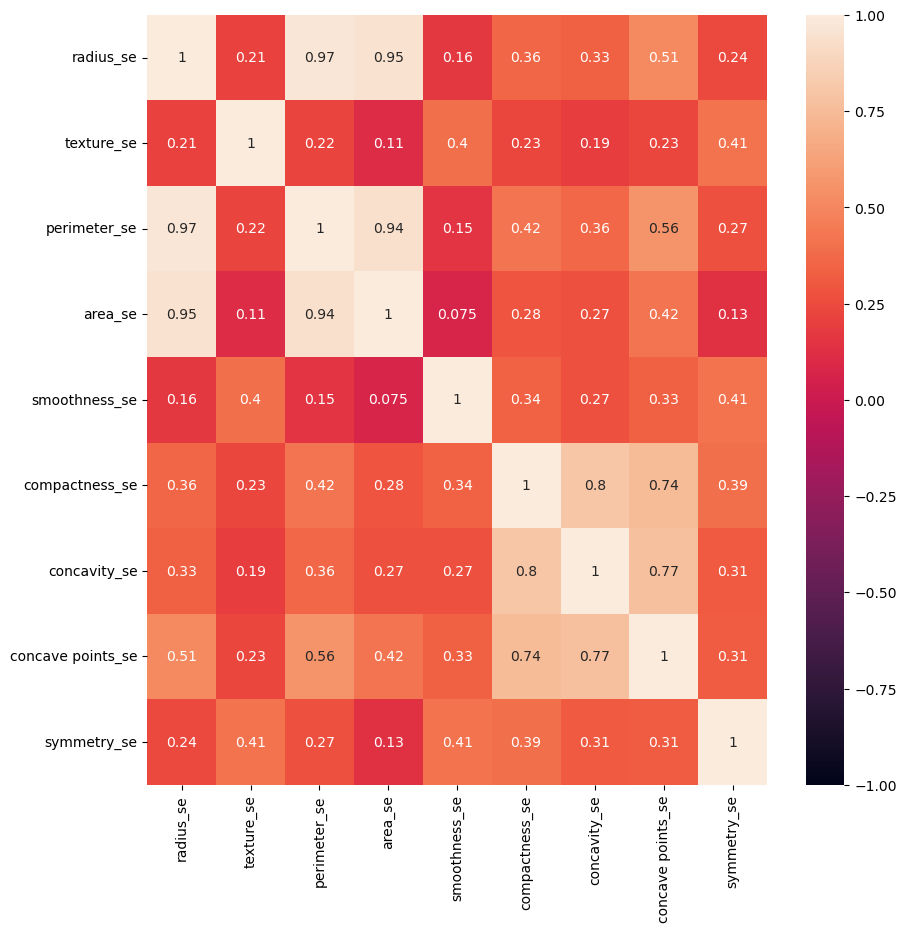

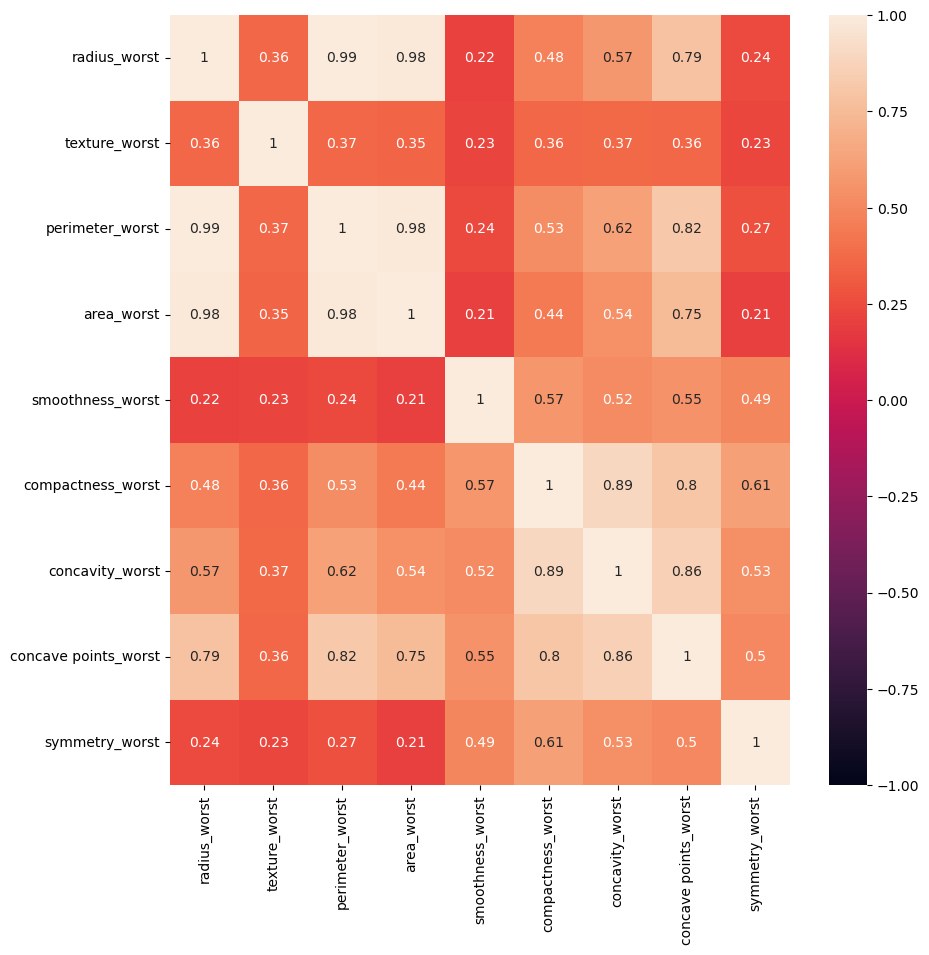

In [11]:
# Correlation matrix
for list in num_features_lists:
    plt.figure(figsize=(10,10))
    sns.heatmap(ds[list].corr(), vmin=-1, vmax=1, annot=True)
    plt.show()

In [12]:
# Correlation between numerical and categorical data
corr_matrix = []

for list in num_features_lists:
    for col1 in list:
        for col2 in cat_features:
            if ds[col2].dtype == object:
                df=ds.fillna(ds.mean())
                encoder = LabelEncoder()
                encoded_col = encoder.fit_transform(df[col2])
                correlation = stats.pointbiserialr(df[col1], encoded_col)[0]
            else:
                correlation = stats.pointbiserialr(ds[col1], ds[col2])[0]
            corr_matrix.append((col1, col2, correlation))

cm_ds = pd.DataFrame(corr_matrix)
cm_ds_sorted = cm_ds.sort_values(by=cm_ds.columns[-1])
cm_ds_sorted

C:\Users\user\AppData\Local\Temp\ipykernel_12212\3846944286.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df=ds.fillna(ds.mean())


,0,1,2
13,smoothness_se,diagnosis,-0.067016
10,texture_se,diagnosis,-0.008303
17,symmetry_se,diagnosis,-0.006522
15,concavity_se,diagnosis,0.253730
14,compactness_se,diagnosis,0.292999
8,symmetry_mean,diagnosis,0.330499
4,smoothness_mean,diagnosis,0.358560
16,concave points_se,diagnosis,0.408042
1,texture_mean,diagnosis,0.415185
26,symmetry_worst,diagnosis,0.416294


C:\Users\user\AppData\Local\Temp\ipykernel_12212\455811017.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(15,5))


<Figure size 1500x500 with 0 Axes>

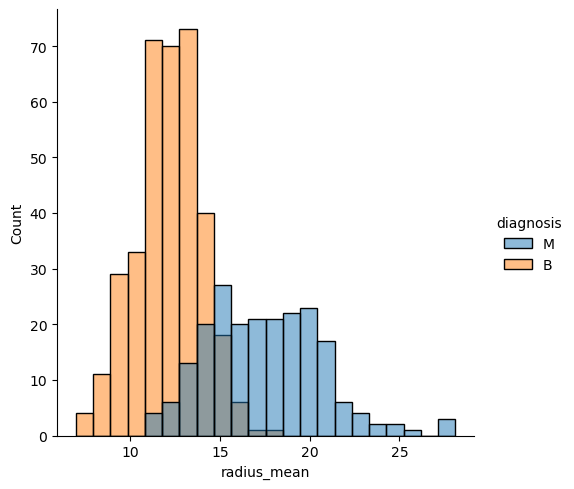

<Figure size 1500x500 with 0 Axes>

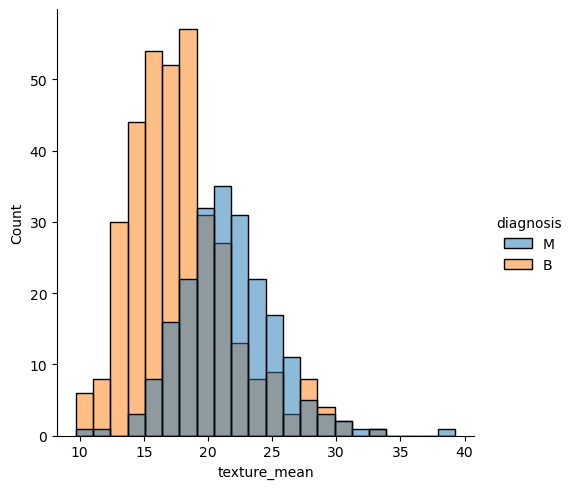

<Figure size 1500x500 with 0 Axes>

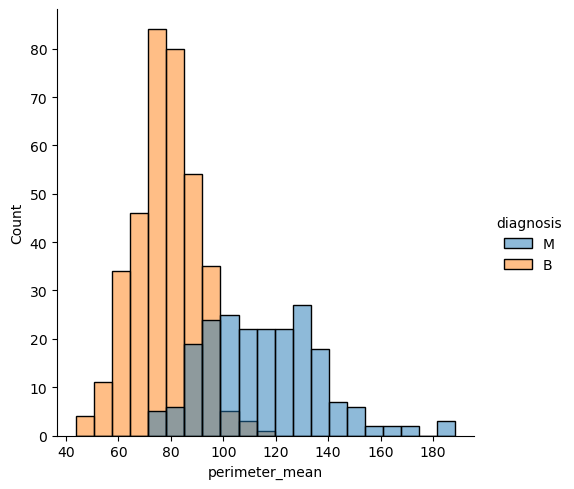

<Figure size 1500x500 with 0 Axes>

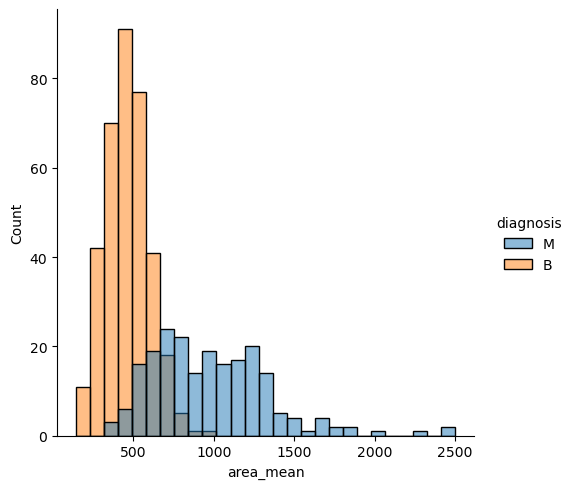

<Figure size 1500x500 with 0 Axes>

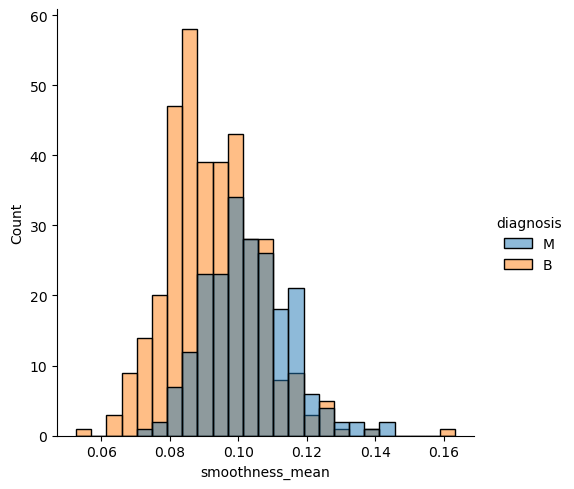

<Figure size 1500x500 with 0 Axes>

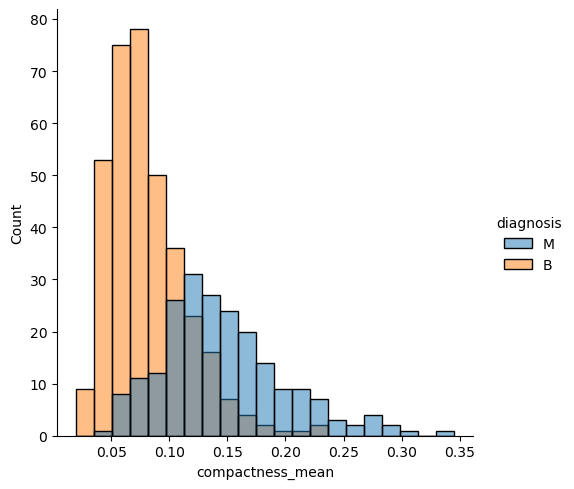

<Figure size 1500x500 with 0 Axes>

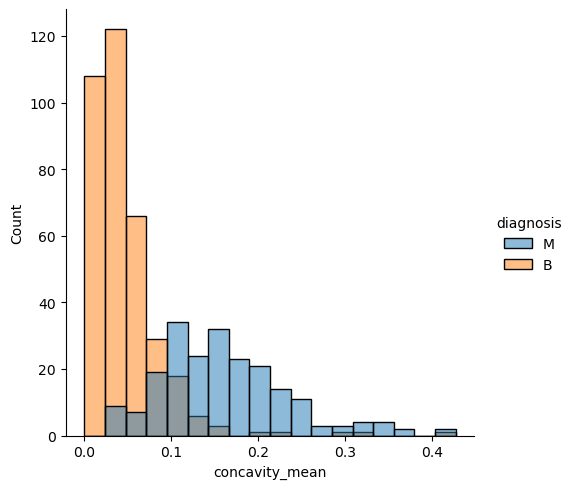

<Figure size 1500x500 with 0 Axes>

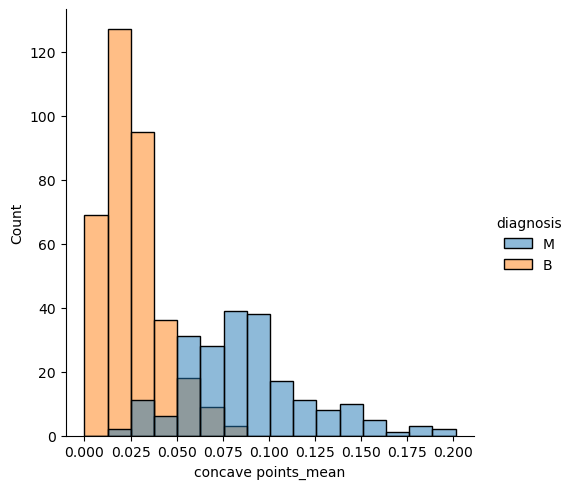

<Figure size 1500x500 with 0 Axes>

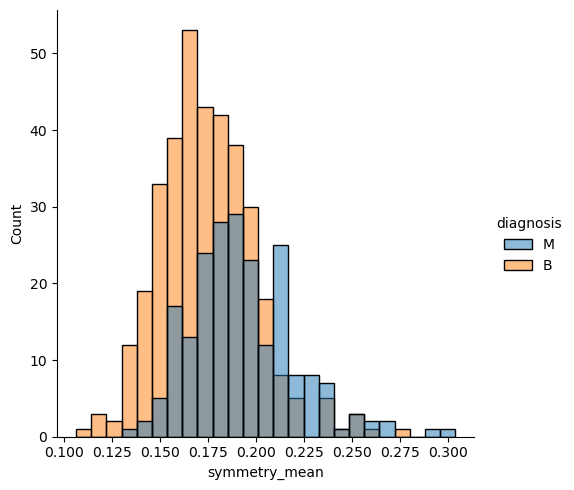

<Figure size 1500x500 with 0 Axes>

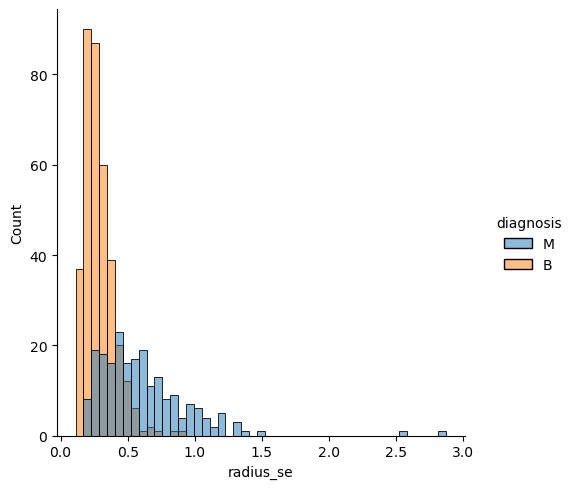

<Figure size 1500x500 with 0 Axes>

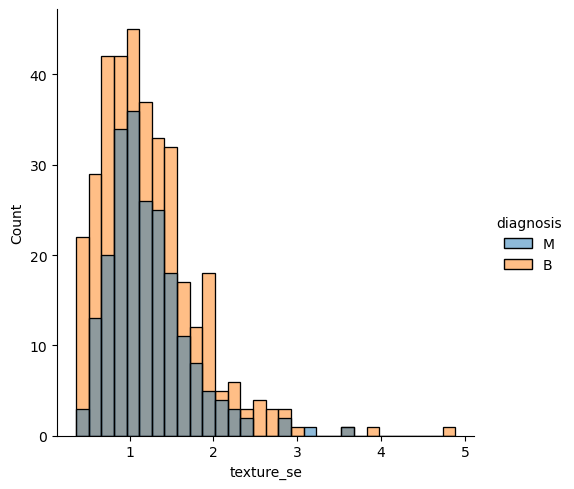

<Figure size 1500x500 with 0 Axes>

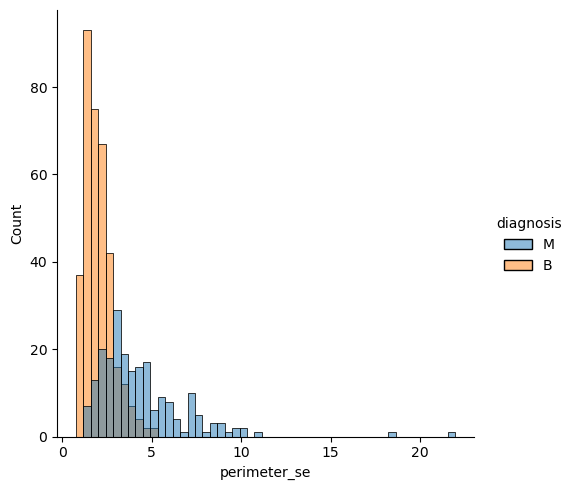

<Figure size 1500x500 with 0 Axes>

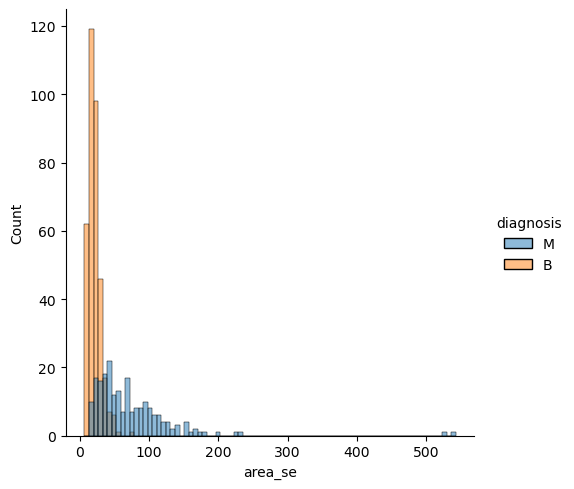

<Figure size 1500x500 with 0 Axes>

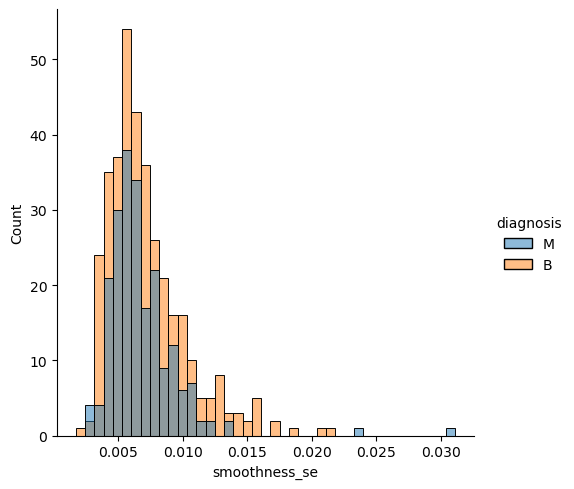

<Figure size 1500x500 with 0 Axes>

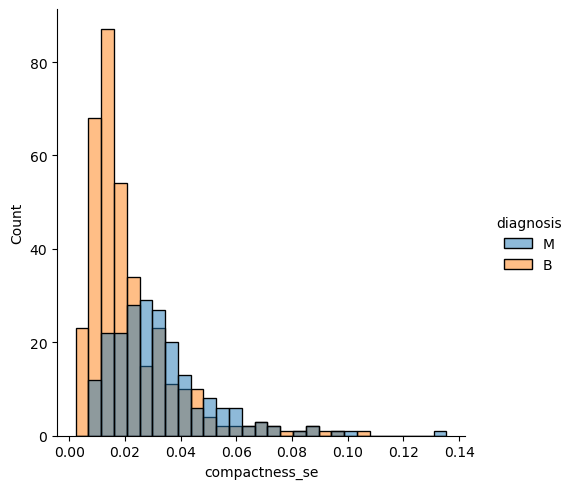

<Figure size 1500x500 with 0 Axes>

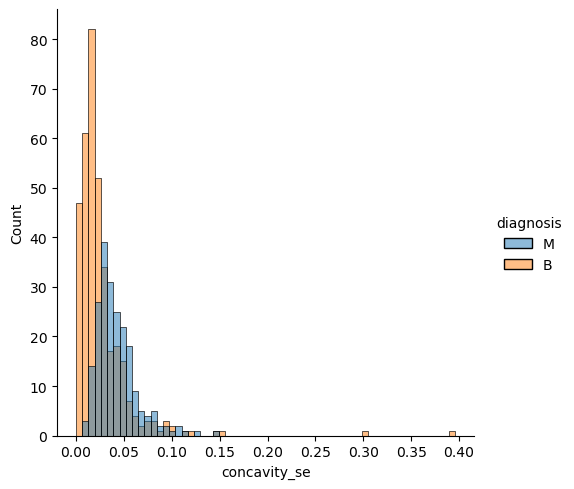

<Figure size 1500x500 with 0 Axes>

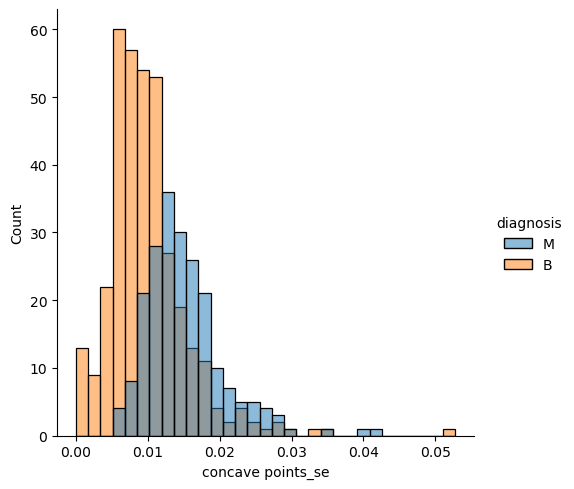

<Figure size 1500x500 with 0 Axes>

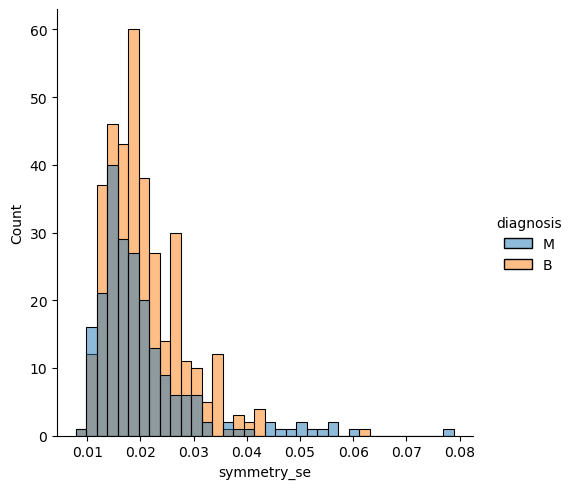

<Figure size 1500x500 with 0 Axes>

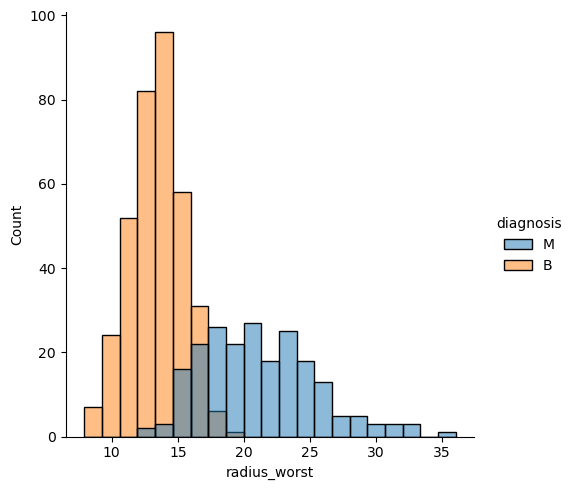

<Figure size 1500x500 with 0 Axes>

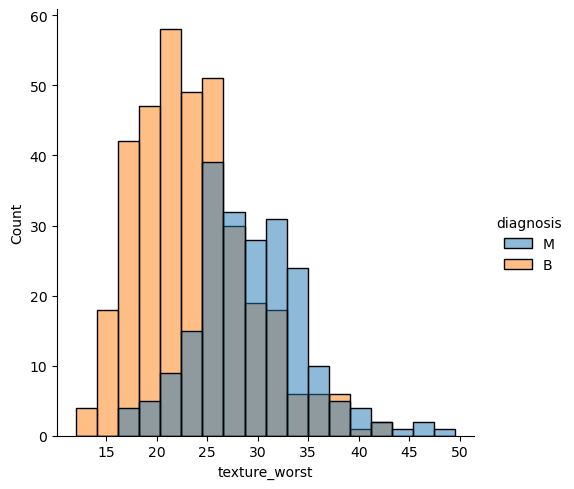

<Figure size 1500x500 with 0 Axes>

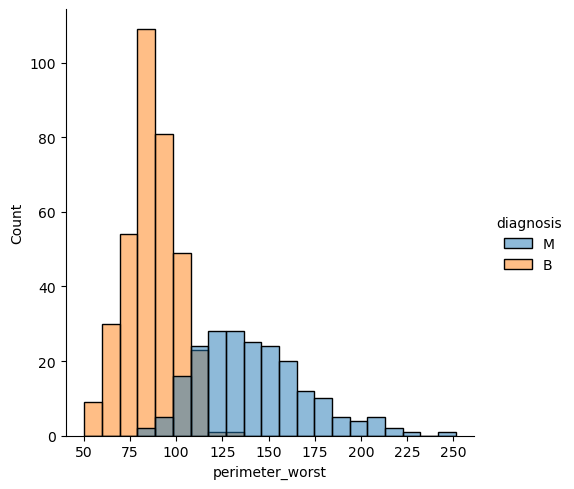

<Figure size 1500x500 with 0 Axes>

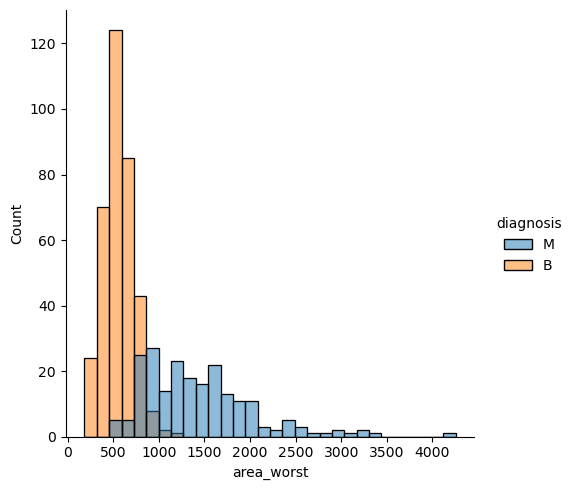

<Figure size 1500x500 with 0 Axes>

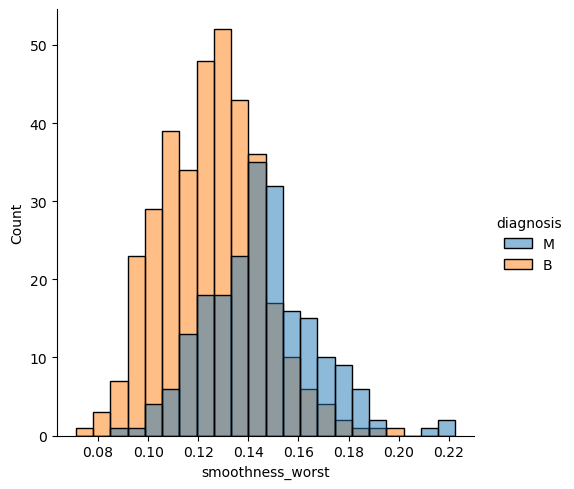

<Figure size 1500x500 with 0 Axes>

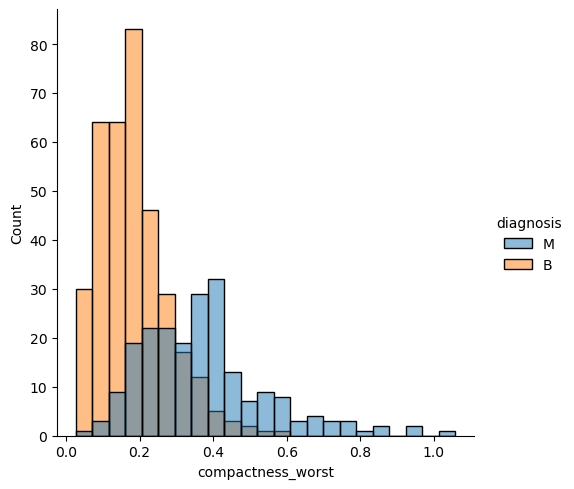

<Figure size 1500x500 with 0 Axes>

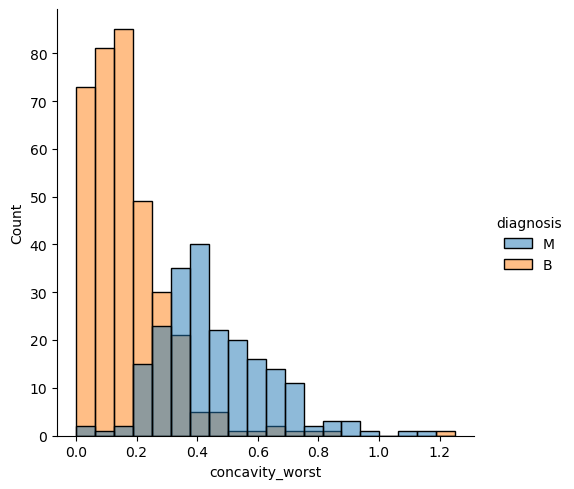

<Figure size 1500x500 with 0 Axes>

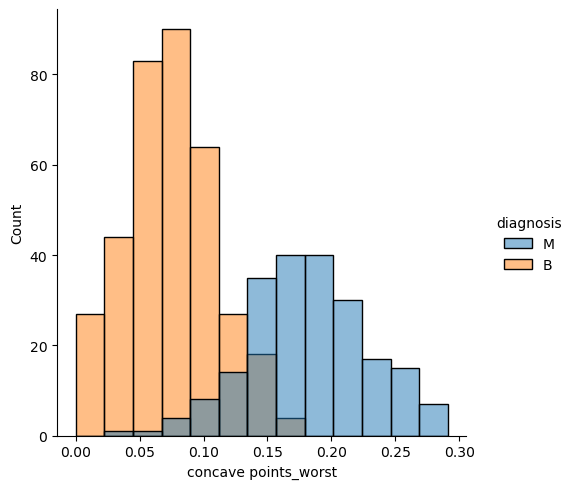

<Figure size 1500x500 with 0 Axes>

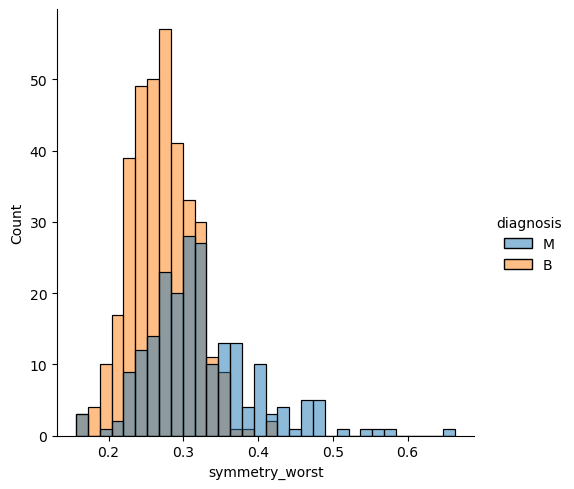

In [13]:
for list in num_features_lists:
    for feature in list:
      plt.figure(figsize=(15,5))
      sns.displot(x=feature, hue='diagnosis',data=ds)

C:\Users\user\AppData\Local\Temp\ipykernel_12212\1948993528.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,10))


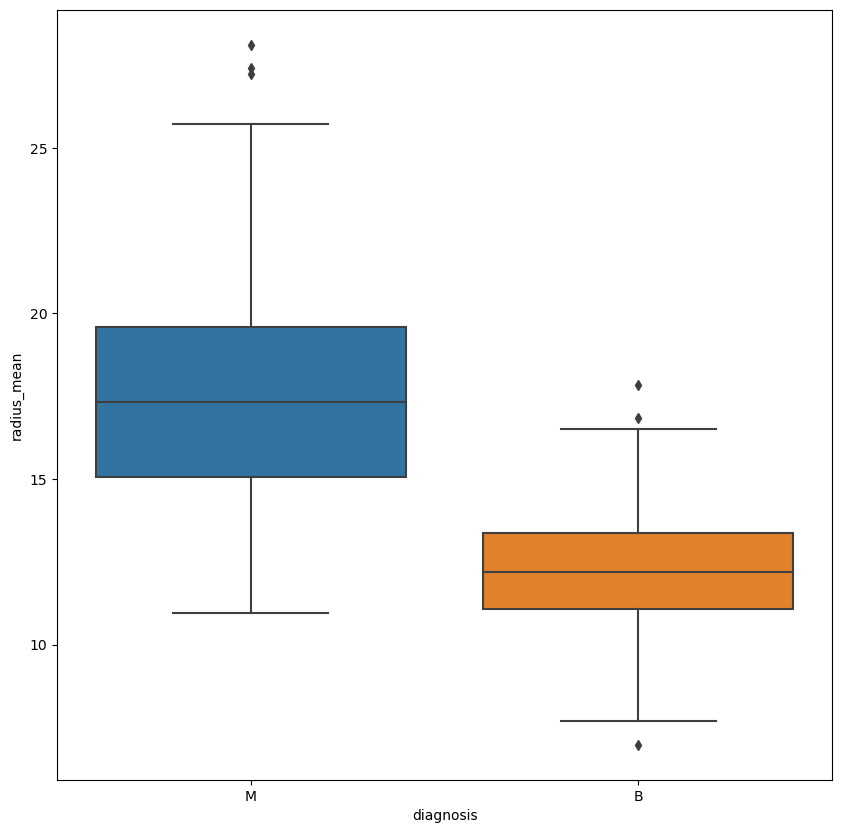

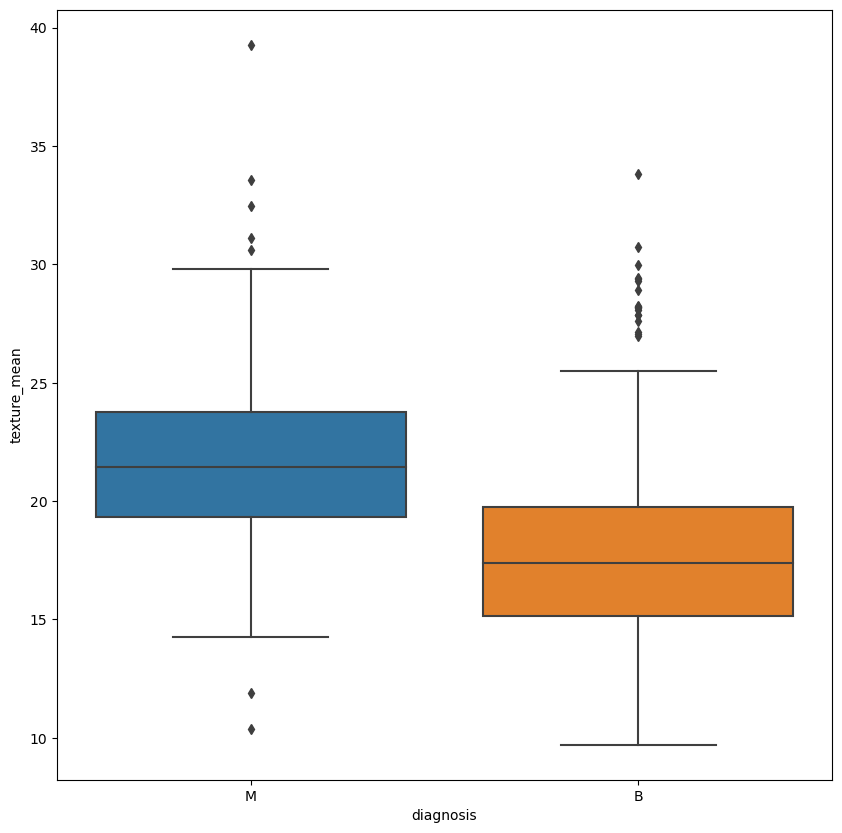

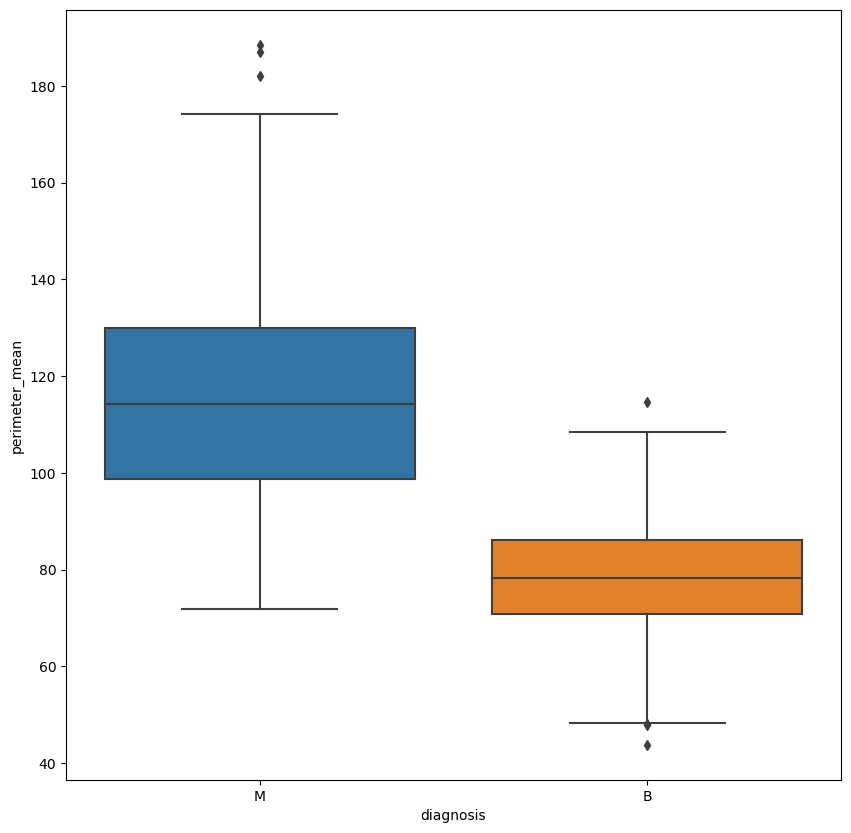

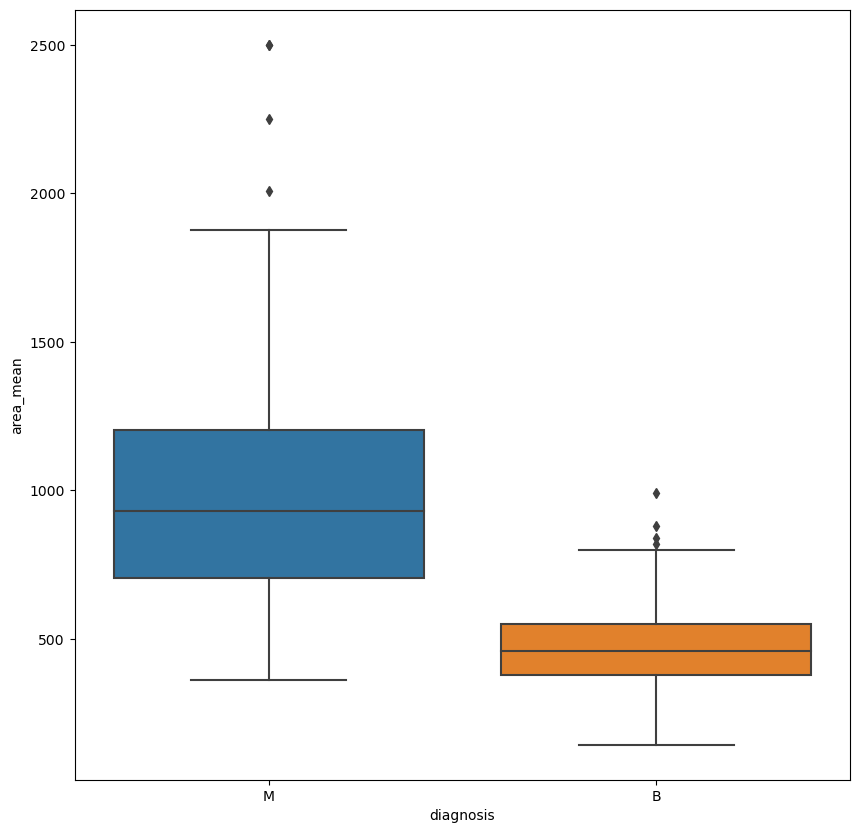

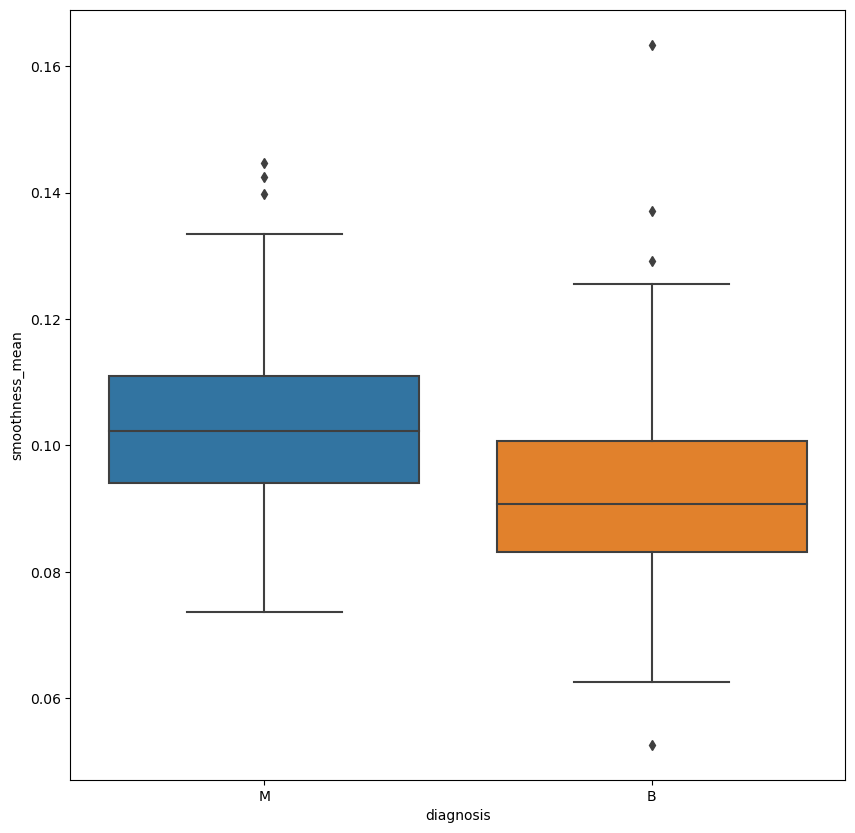

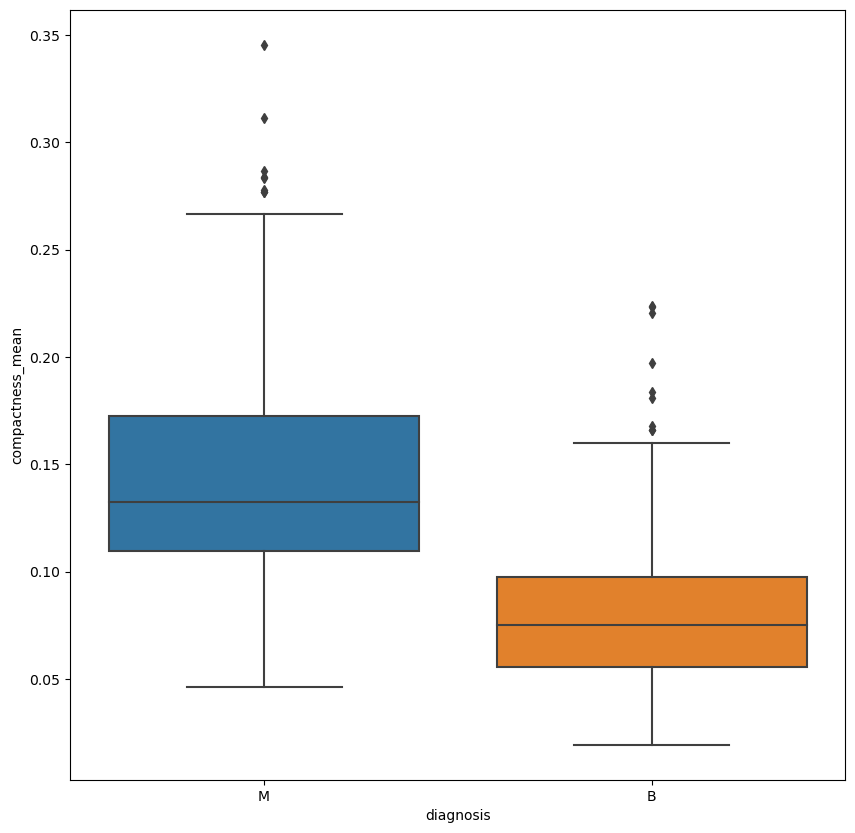

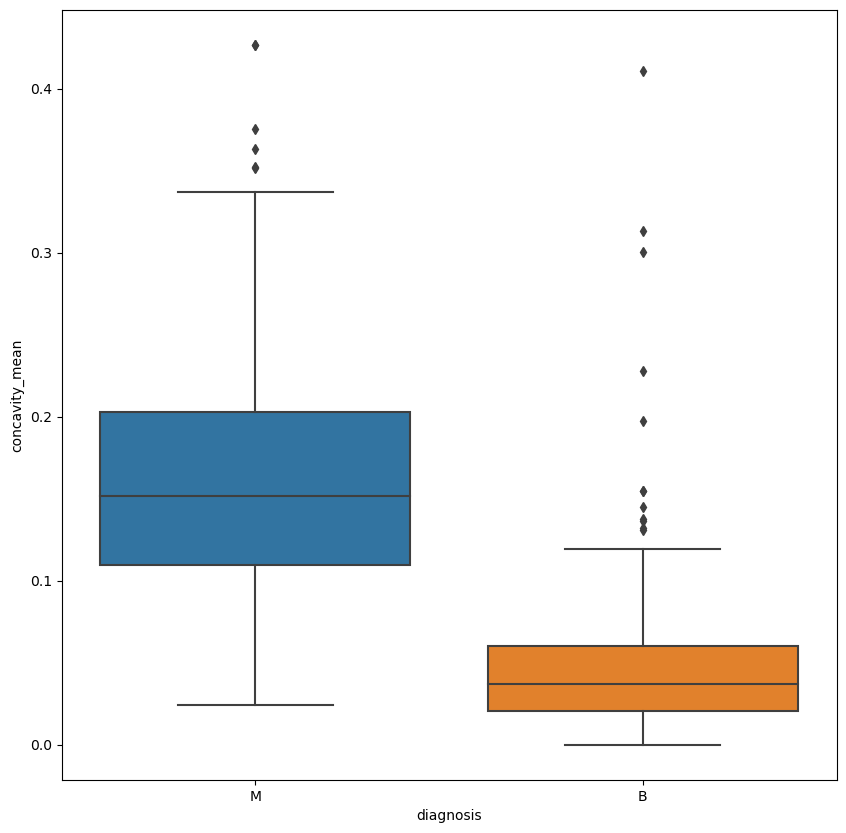

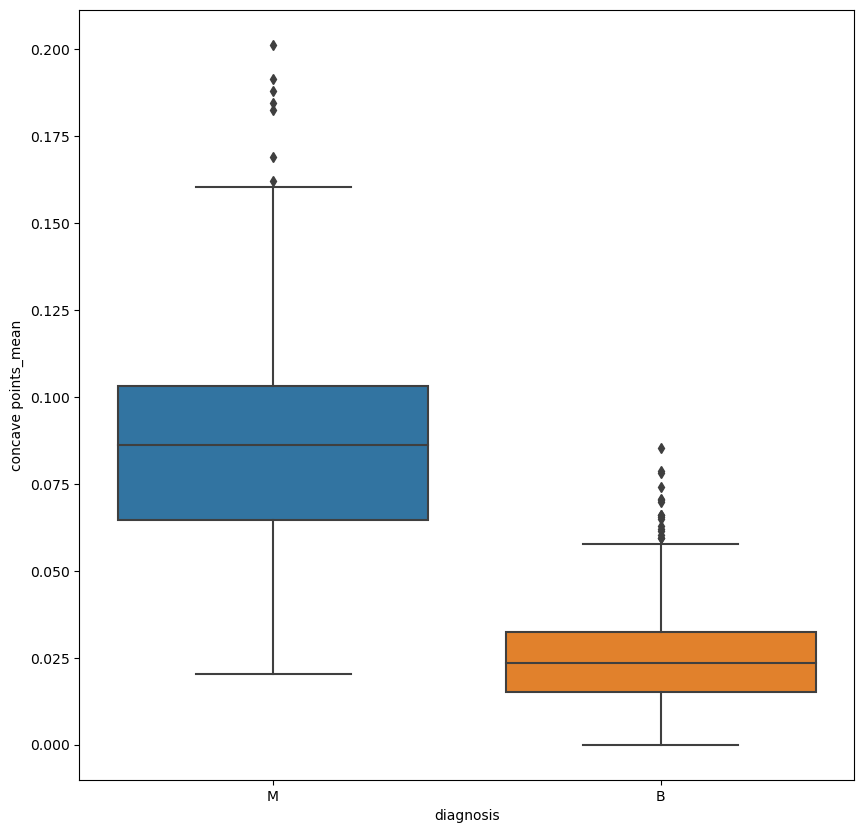

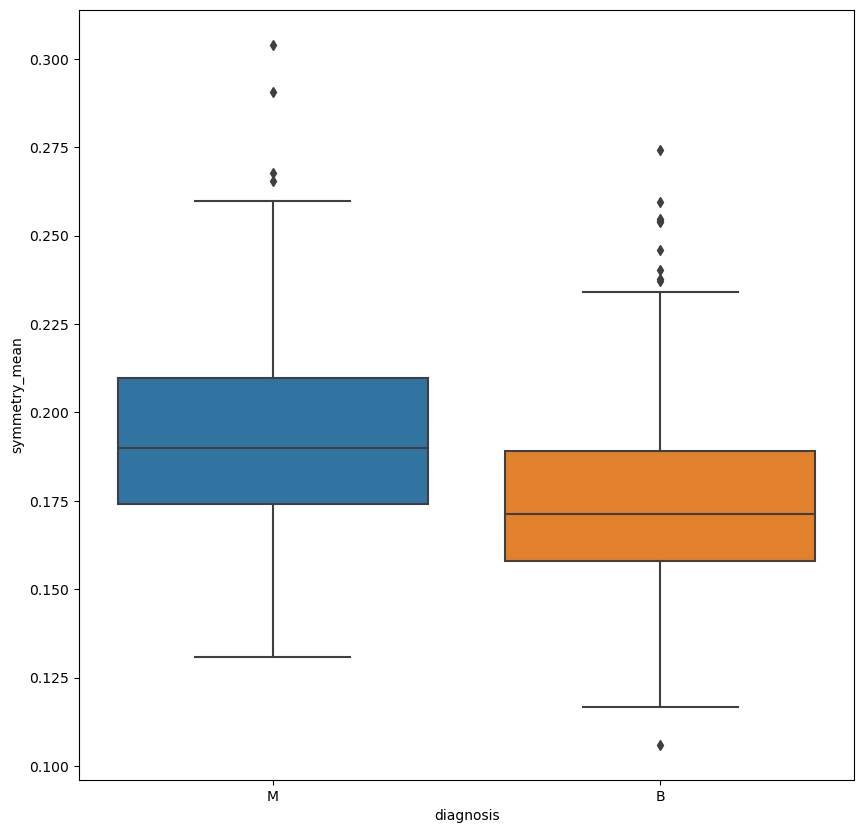

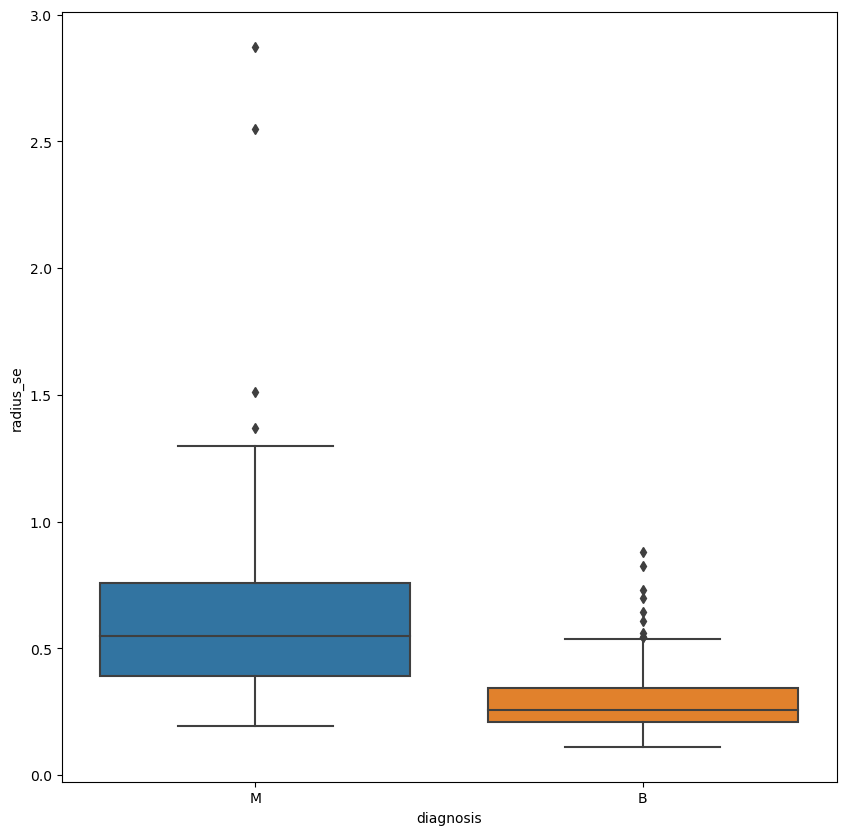

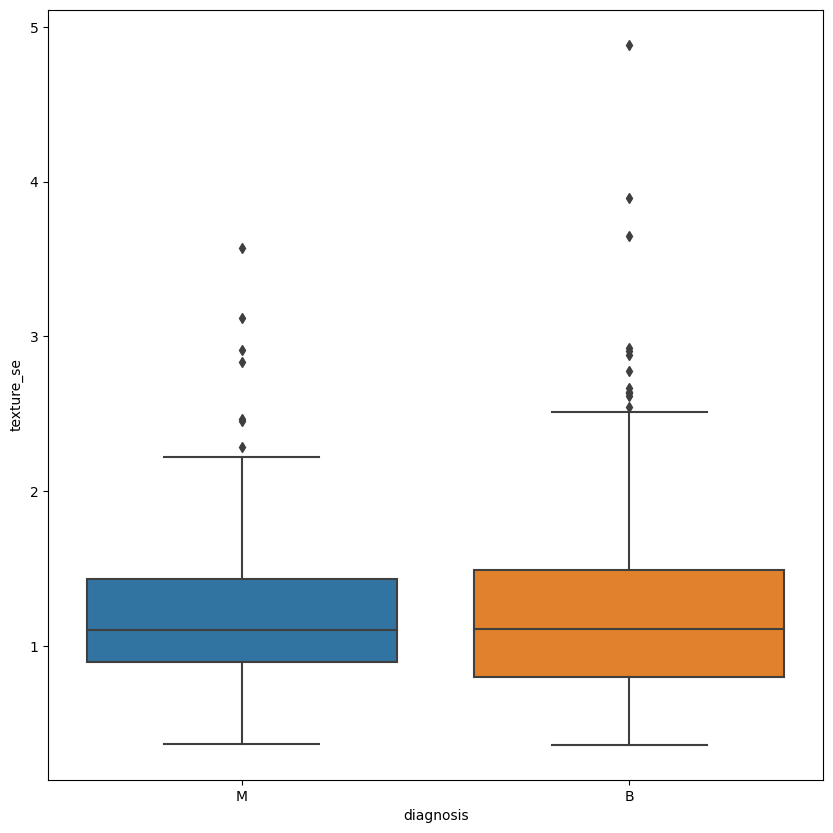

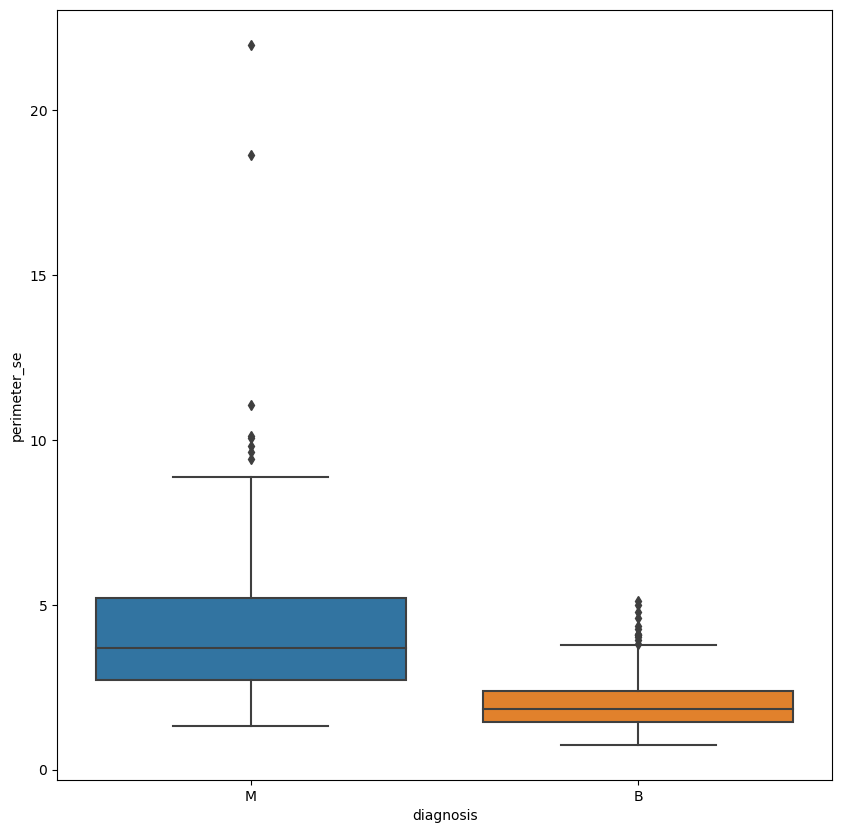

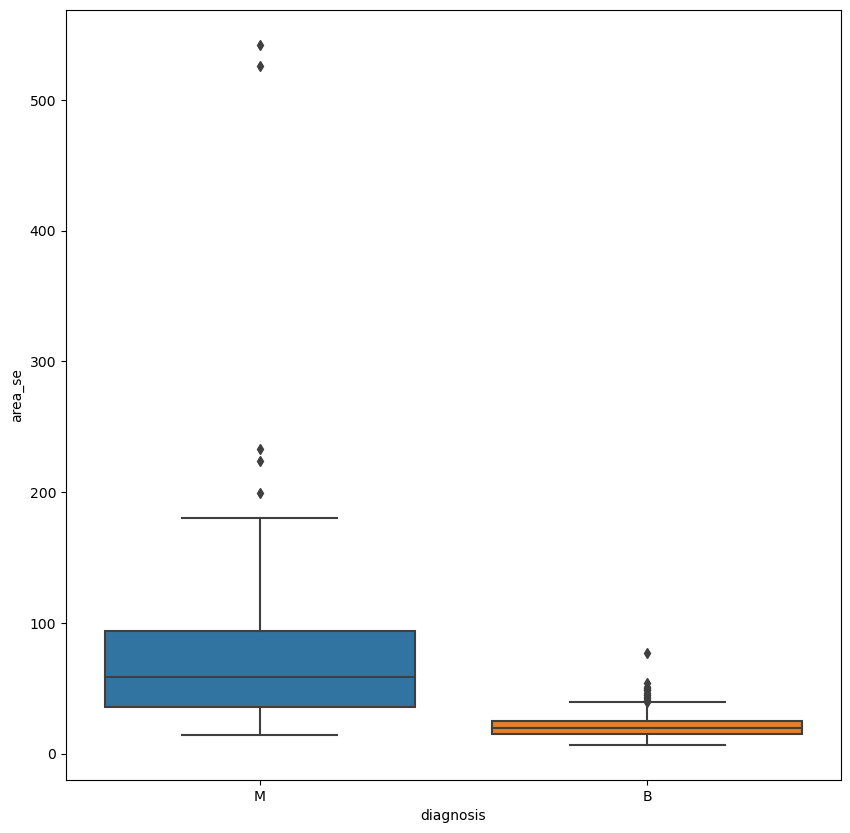

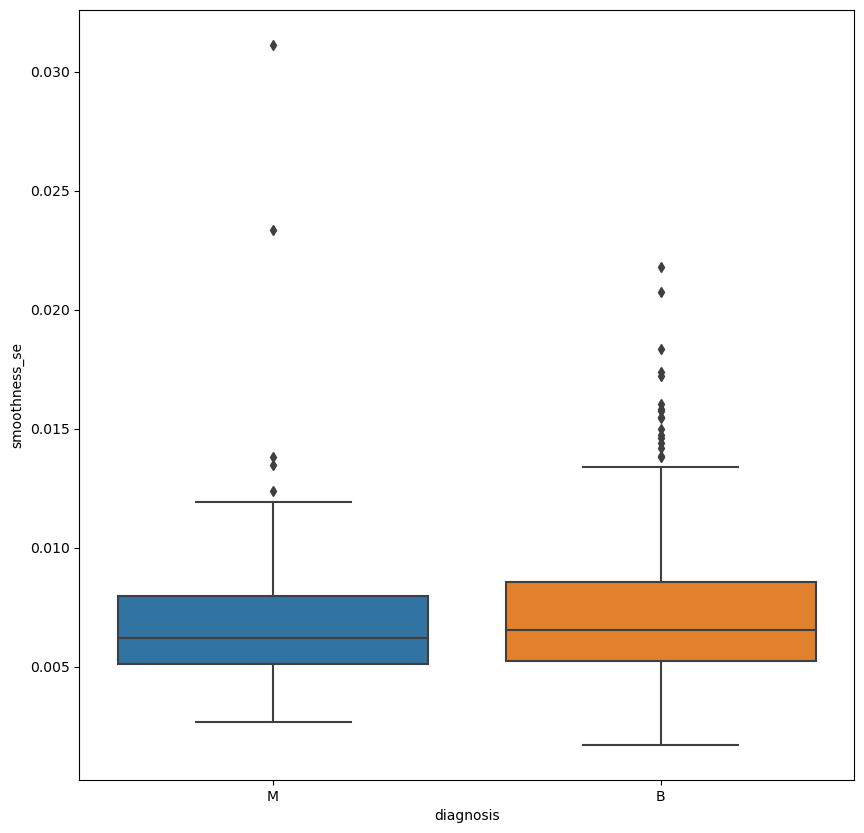

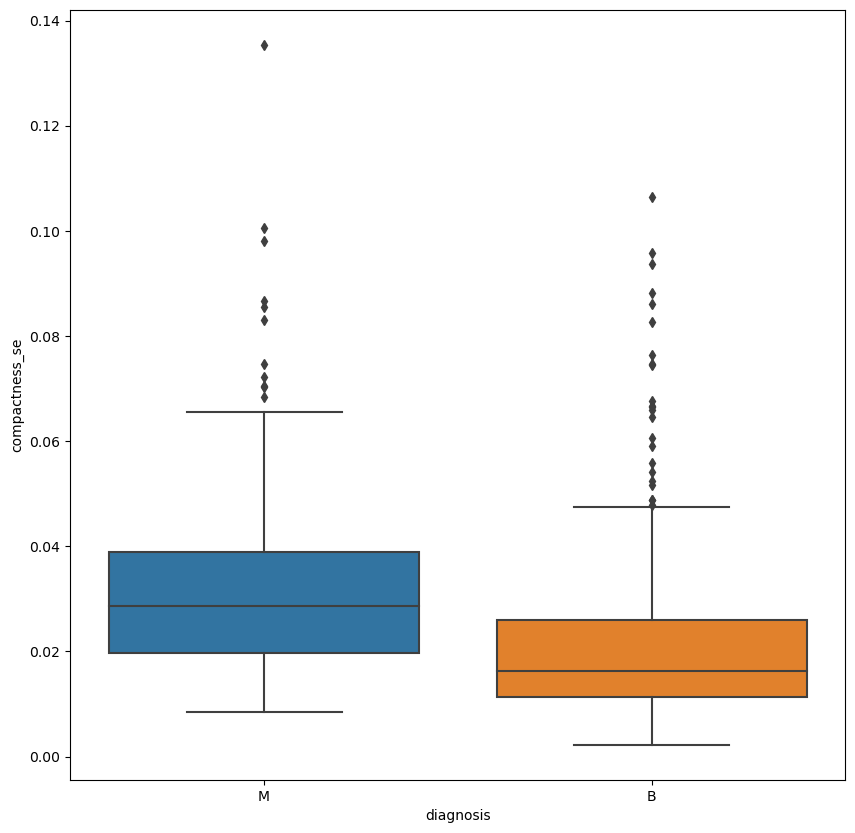

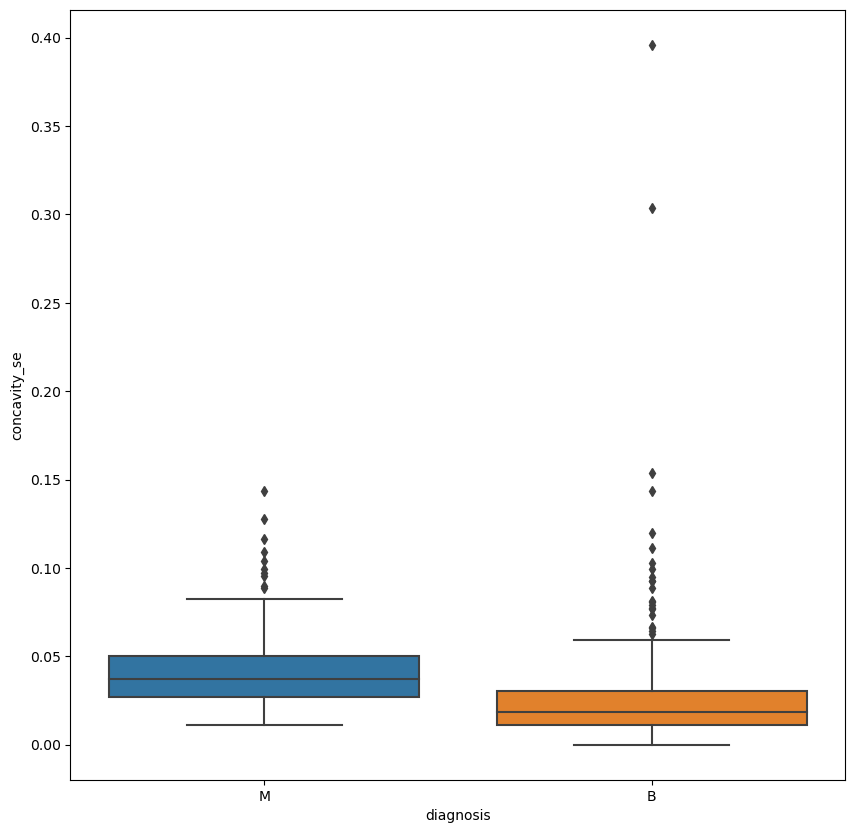

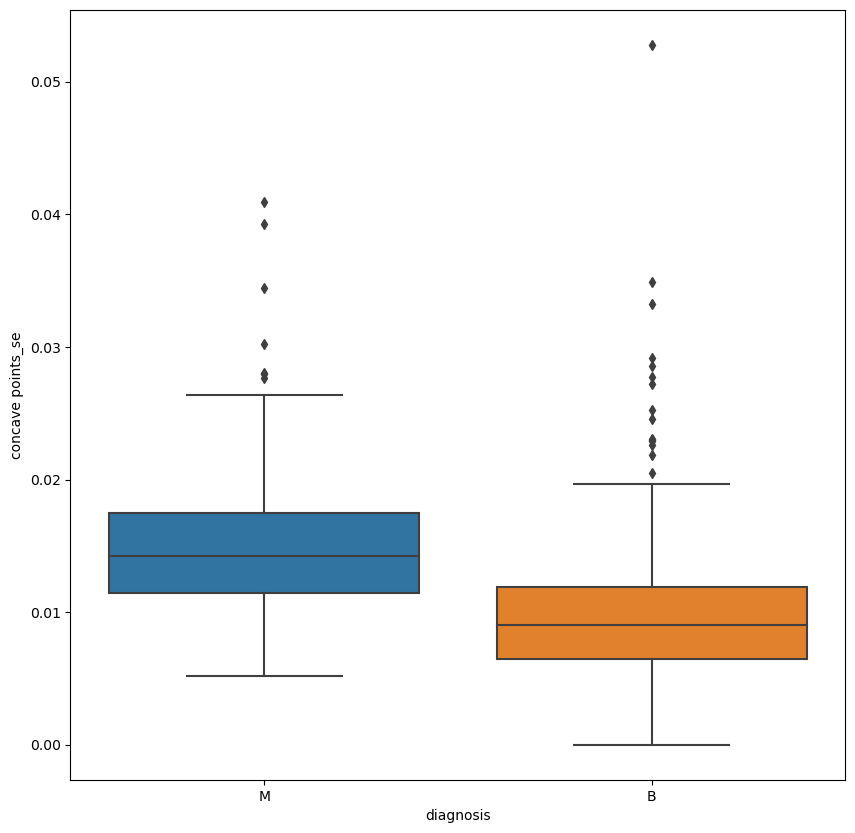

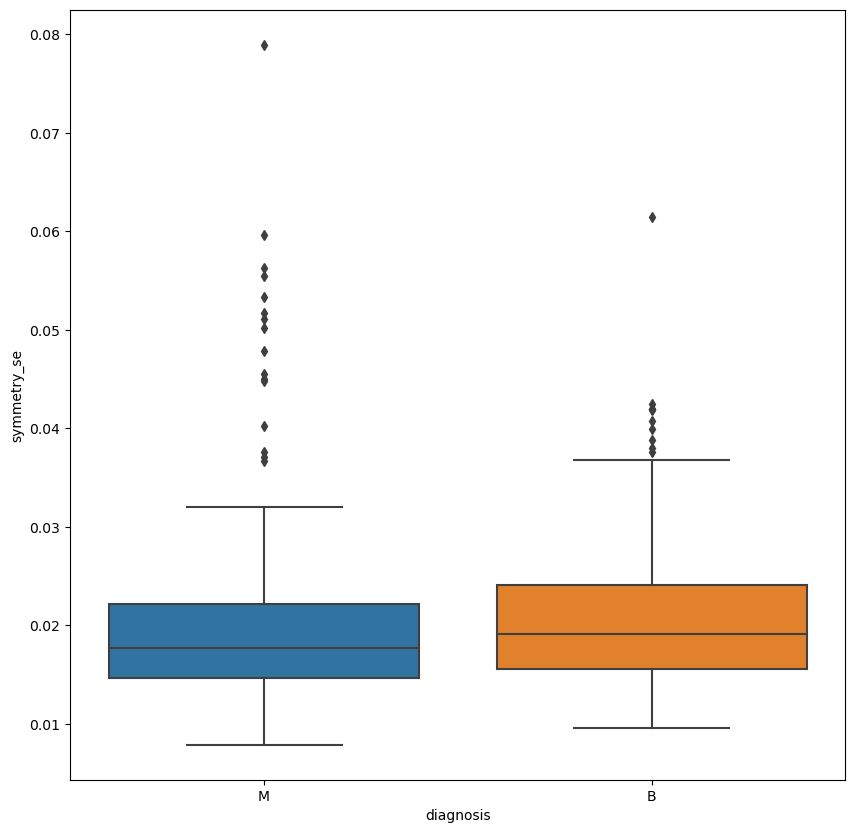

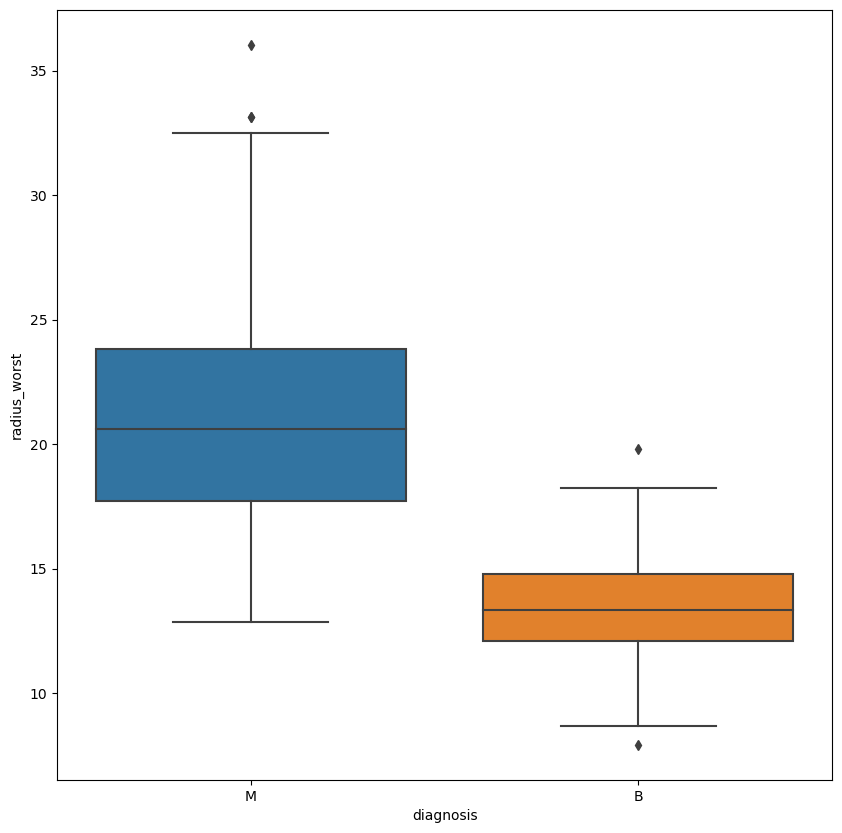

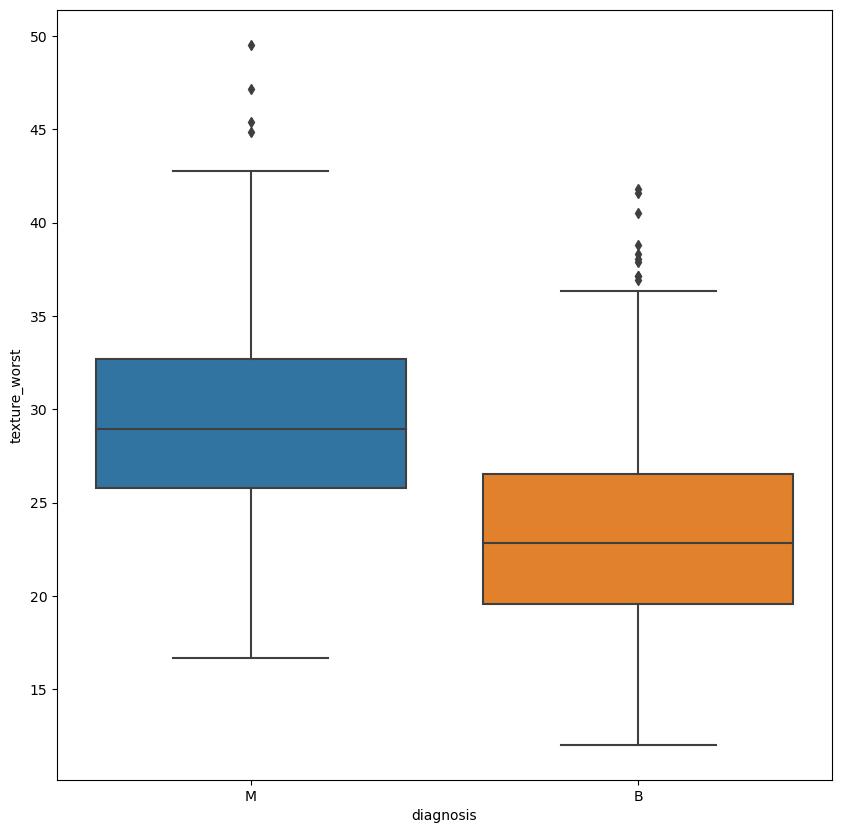

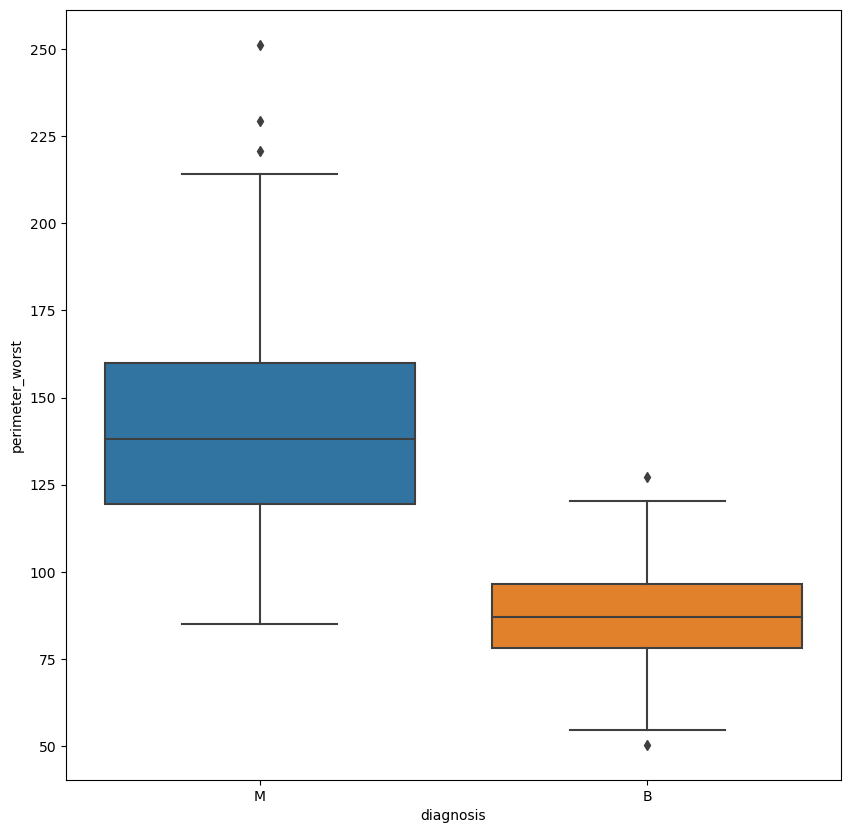

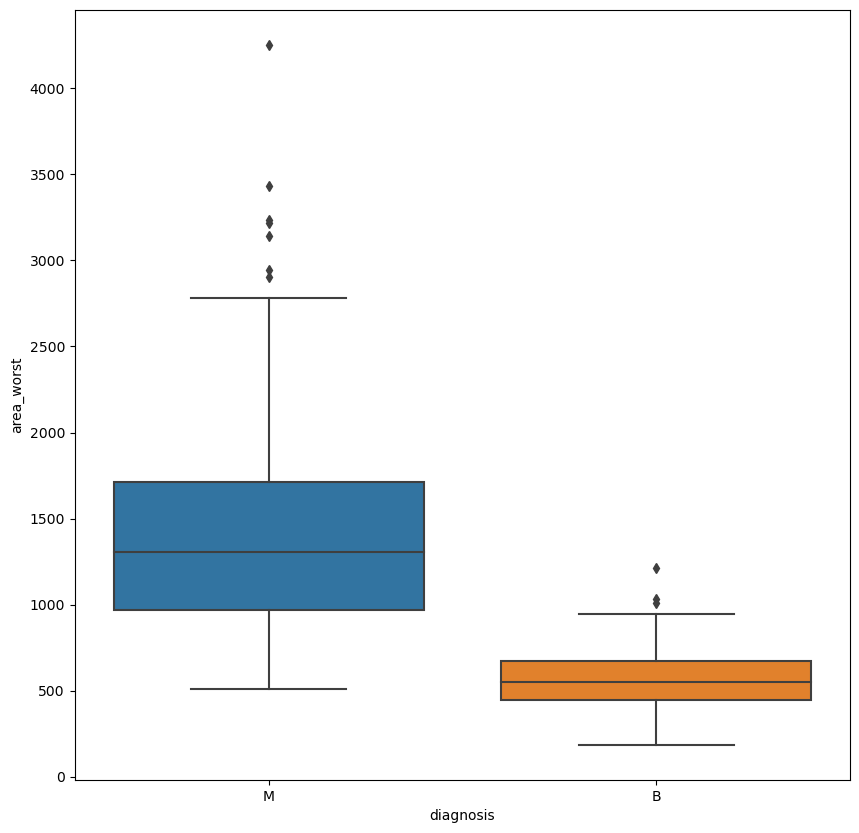

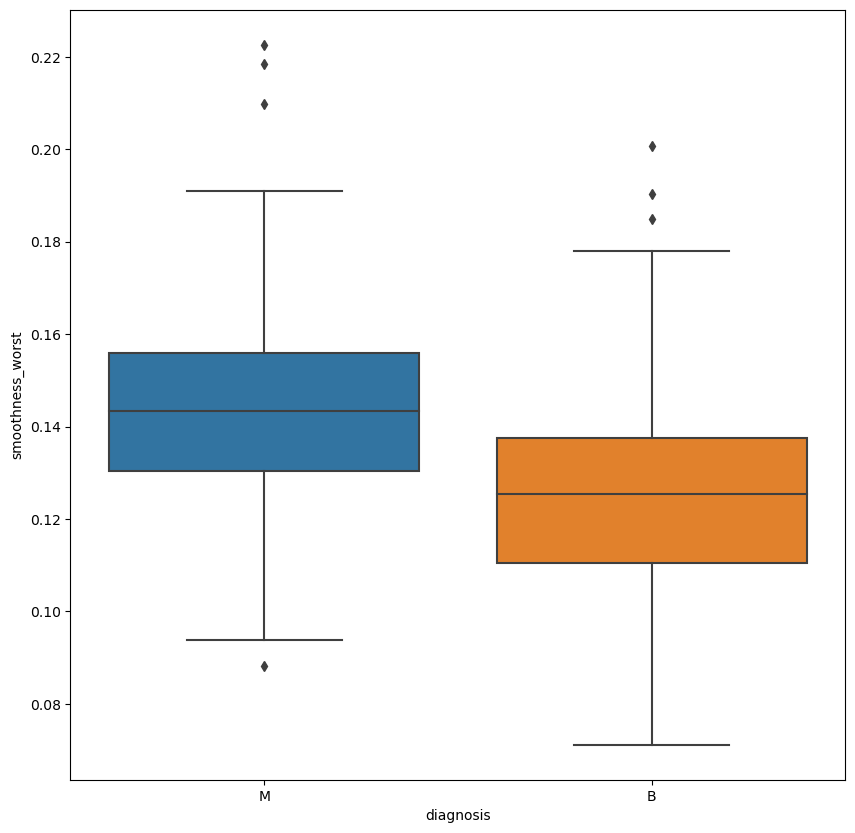

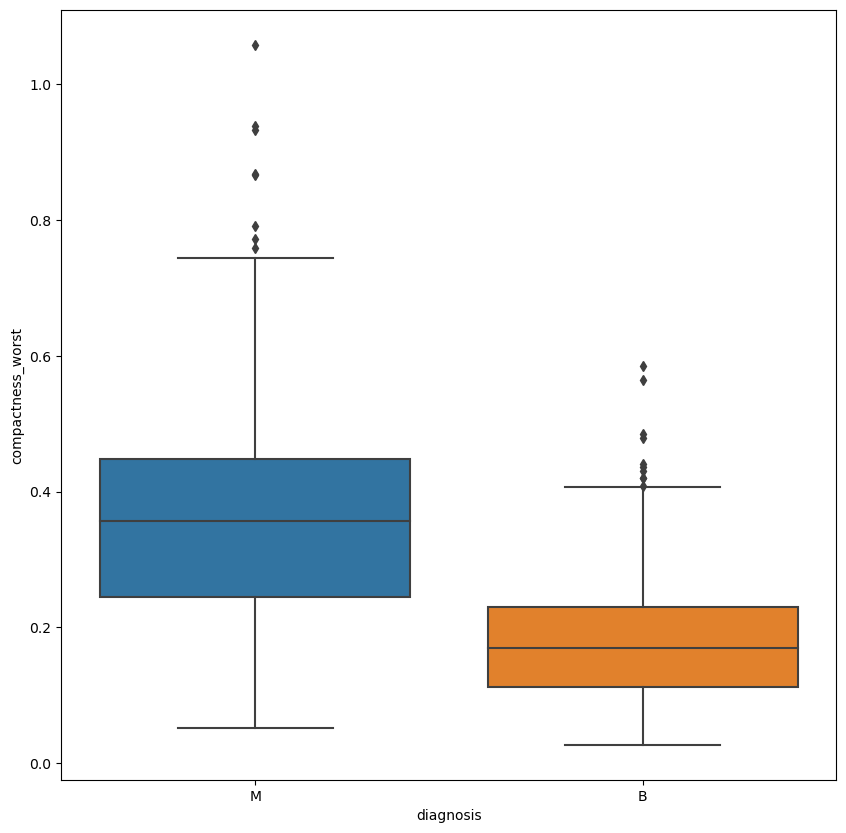

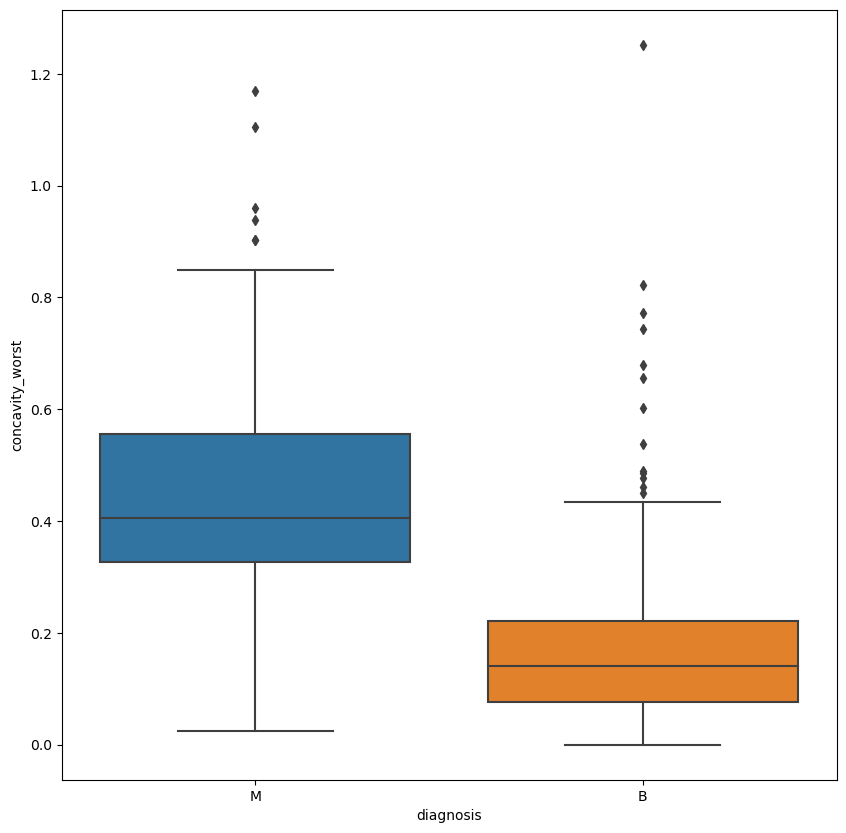

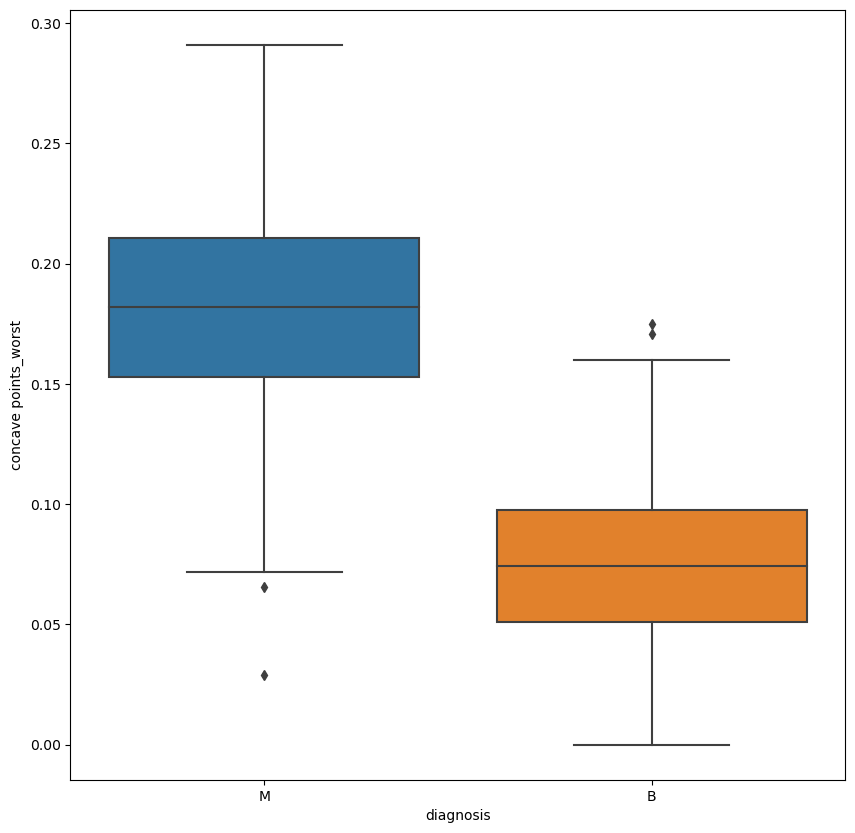

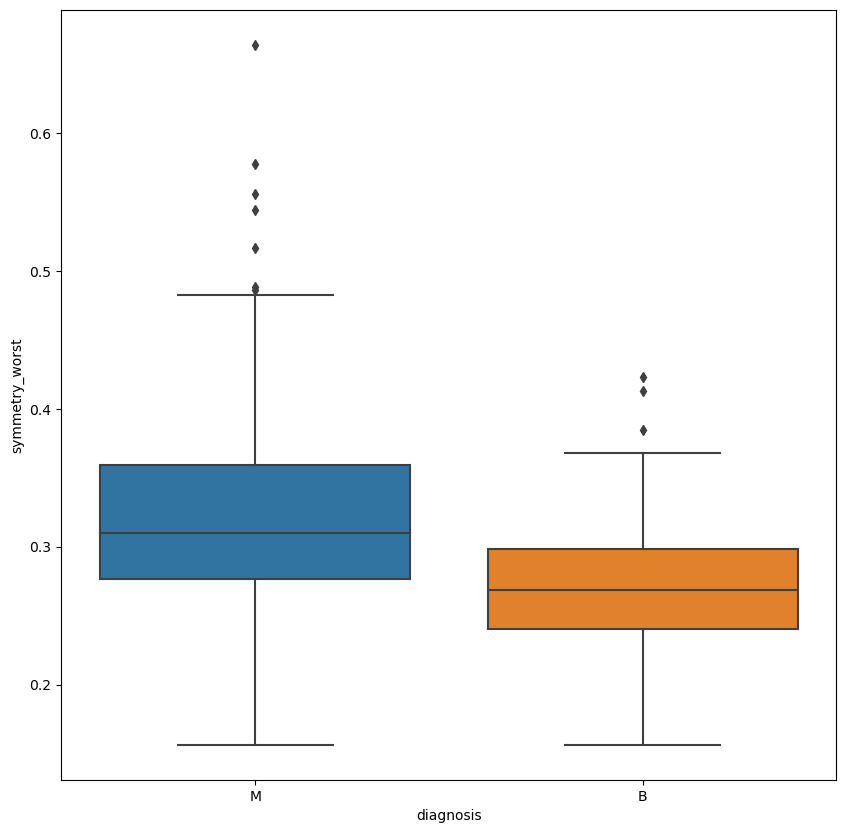

In [14]:
# Boxplots for numerical features
for list in num_features_lists:
    for feature in list:
        plt.figure(figsize=(10,10))
        sns.boxplot(x='diagnosis', y=feature, data=ds)

In [15]:
# Confusion matrix
def conf_matrix(y_checked, model_predictions):
    plt.figure()
    cm = confusion_matrix(y_checked, model_predictions)
    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
    ax.set_title('Confusion Matrix\n\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    plt.show()

In [16]:
# Model evaluation

models_data=[]

def model_evaluation(model, name, X_checked, y_checked):
    predictions = model.predict(X_checked)
    predictions_proba = model.predict_proba(X_checked)[:, 1]
    accuracy = accuracy_score(y_checked, predictions)
    auc_roc = roc_auc_score(y_checked, predictions_proba)
    f1 = f1_score(y_checked, predictions)
    print('Confusion Matrix:')
    conf_matrix(y_checked, predictions)
    print('Classification Report:\n', classification_report(y_checked, predictions))
    models_data.append((name, accuracy, auc_roc, f1))
    df = pd.DataFrame(models_data, columns=['Model', 'Accuracy', 'AUC-ROC', 'F1 Score'])
    return df

In [17]:
# Data preparation

ds['diagnosis'] = ds['diagnosis'].replace('M', 0)
ds['diagnosis'] = ds['diagnosis'].replace('B', 1)

X= ds.drop(['diagnosis'], axis=1,).copy()
y=ds['diagnosis'].copy()

num_features=ds.columns[1:].tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [18]:
# Numerical features preparation
num_preparation = Pipeline(steps=[
    ('polynomial_features', PolynomialFeatures(degree=3)),
    ('scaler_1', StandardScaler()),
    ('pca', PCA(n_components=0.95)),
    ('scaler_2', StandardScaler())
])

# transformer
data_preparation = ColumnTransformer(transformers=[
    ('numeric_preprocessing', num_preparation, num_features)
])

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Parameters:  {'preprocessor__numeric_preprocessing__pca__n_components': 0.95, 'preprocessor__numeric_preprocessing__polynomial_features__degree': 1}
Confusion Matrix:


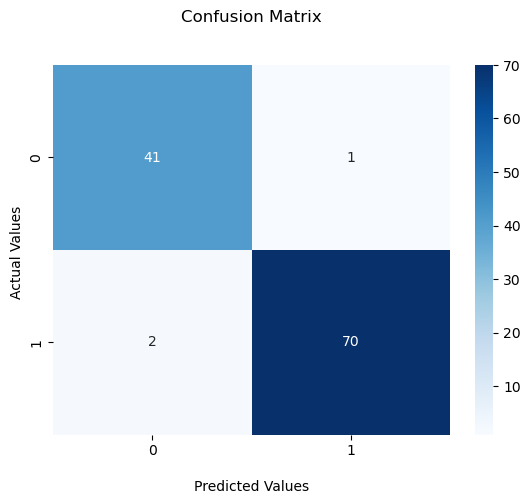

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96        42
           1       0.99      0.97      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



,Model,Accuracy,AUC-ROC,F1 Score
0,LogisticRegression,0.973684,0.994378,0.979021


In [19]:
#Logistic Regression
model_pipeline_v1 = Pipeline(steps=[('preprocessor', data_preparation),
                                    ('model', LogisticRegression(max_iter=2000))])

params = {
    'preprocessor__numeric_preprocessing__polynomial_features__degree': [1, 2, 3, 4],
    'preprocessor__numeric_preprocessing__pca__n_components': [0.85, 0.90, 0.95, 0.99, 0.99999]
}

model_1 = GridSearchCV(model_pipeline_v1, params, cv=5, n_jobs=-1, verbose=10, scoring='f1_macro')
model_1.fit(X_train, y_train)
print('Parameters: ', model_1.best_params_)
model_1 = model_1.best_estimator_
model_evaluation(model_1,'LogisticRegression',X_test,y_test)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Parameters:  {'model__n_neighbors': 5, 'preprocessor__numeric_preprocessing__pca__n_components': 0.85, 'preprocessor__numeric_preprocessing__polynomial_features__degree': 1}
Confusion Matrix:


C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


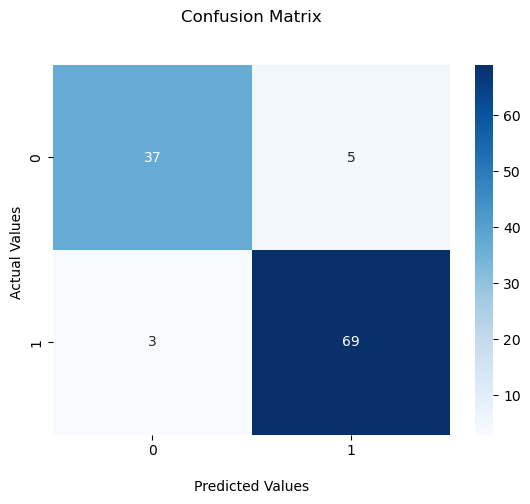

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.88      0.90        42
           1       0.93      0.96      0.95        72

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



,Model,Accuracy,AUC-ROC,F1 Score
0,LogisticRegression,0.973684,0.994378,0.979021
1,KNeighbors,0.929825,0.975860,0.945205


In [20]:
# K Neighbors Classifier

model_pipeline_v2 = Pipeline(steps=[('preprocessor', data_preparation),
                                    ('model', KNeighborsClassifier())])

params = {
    'preprocessor__numeric_preprocessing__pca__n_components': [0.85, 0.90, 0.95, 0.99, 0.99999],
    'preprocessor__numeric_preprocessing__polynomial_features__degree': [1, 2, 3, 4],
    'model__n_neighbors': [1,5,10,50,100,300]
}

model_2 = GridSearchCV(model_pipeline_v2, params, cv=5, n_jobs=-1, verbose=10, scoring='f1_macro')
model_2.fit(X_train, y_train)
print('Parameters: ', model_2.best_params_)
model_2 = model_2.best_estimator_

model_evaluation(model_2,'KNeighbors',X_test,y_test)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits
Parameters:  {'model__depth': 6, 'model__learning_rate': 0.5, 'preprocessor__numeric_preprocessing__pca__n_components': 0.9, 'preprocessor__numeric_preprocessing__polynomial_features__degree': 3}
Confusion Matrix:


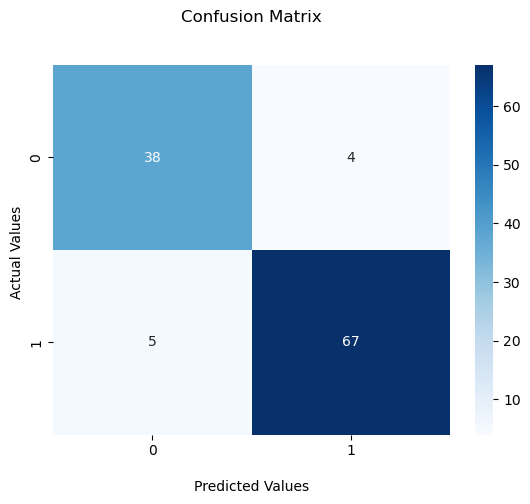

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89        42
           1       0.94      0.93      0.94        72

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



,Model,Accuracy,AUC-ROC,F1 Score
0,LogisticRegression,0.973684,0.994378,0.979021
1,KNeighbors,0.929825,0.975860,0.945205
2,CatBoost,0.921053,0.986111,0.937063


In [21]:
# CatBoost

model_pipeline_v3 = Pipeline(steps=[('preprocessor', data_preparation),
                                    ('model', CatBoostClassifier(iterations=100, verbose=0))])

params = {
    'preprocessor__numeric_preprocessing__pca__n_components': [0.85, 0.90, 0.95, 0.99, 0.99999],
    'preprocessor__numeric_preprocessing__polynomial_features__degree': [1, 2, 3, 4],
    'model__learning_rate': [0.01, 0.05, 0.1, 0.5],
    'model__depth': [4, 6, 8, 10]
}

model_3 = GridSearchCV(model_pipeline_v3, params, cv=5, n_jobs=-1, verbose=10, scoring='f1_macro')
model_3.fit(X_train, y_train)
print('Parameters: ', model_3.best_params_)
model_3 = model_3.best_estimator_

model_evaluation(model_3, 'CatBoost', X_test, y_test)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits
Parameters:  {'model__C': 10, 'model__gamma': 0.1, 'model__kernel': 'linear', 'preprocessor__numeric_preprocessing__pca__n_components': 0.85, 'preprocessor__numeric_preprocessing__polynomial_features__degree': 1}
Confusion Matrix:


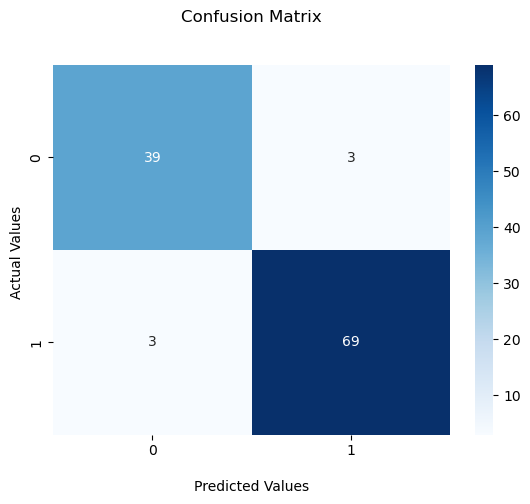

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        42
           1       0.96      0.96      0.96        72

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



,Model,Accuracy,AUC-ROC,F1 Score
0,LogisticRegression,0.973684,0.994378,0.979021
1,KNeighbors,0.929825,0.975860,0.945205
2,CatBoost,0.921053,0.986111,0.937063
3,SVC,0.947368,0.992725,0.958333


In [22]:
# SVC

model_pipeline_v4 = Pipeline(steps=[('preprocessor', data_preparation),
                                    ('model', SVC(probability=True))])

params = {
    'preprocessor__numeric_preprocessing__pca__n_components': [0.85, 0.90, 0.95, 0.99, 0.99999],
    'preprocessor__numeric_preprocessing__polynomial_features__degree': [1, 2, 3, 4],
    'model__kernel': ['linear', 'rbf', 'poly'],
    'model__C': [0.1, 1, 10],
    'model__gamma': [0.1, 0.01, 0.001]
}

model_4 = GridSearchCV(model_pipeline_v4, params, cv=5, n_jobs=-1, verbose=10, scoring='f1_macro')
model_4.fit(X_train, y_train)
print('Parameters: ', model_4.best_params_)
model_4 = model_4.best_estimator_

model_evaluation(model_4,'SVC',X_test,y_test)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits
Parameters:  {'model__max_depth': 10, 'model__n_estimators': 50, 'preprocessor__numeric_preprocessing__pca__n_components': 0.85, 'preprocessor__numeric_preprocessing__polynomial_features__degree': 3}
Confusion Matrix:


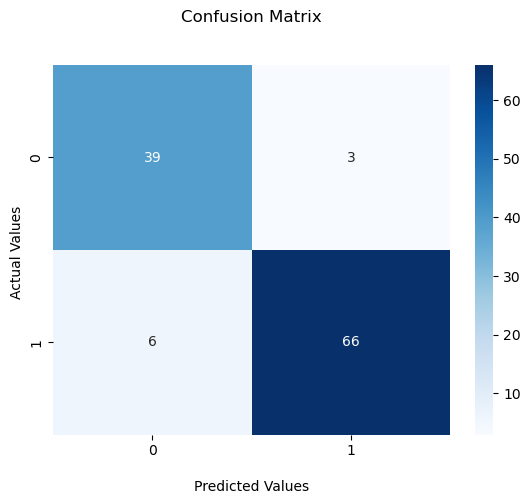

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90        42
           1       0.96      0.92      0.94        72

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



,Model,Accuracy,AUC-ROC,F1 Score
0,LogisticRegression,0.973684,0.994378,0.979021
1,KNeighbors,0.929825,0.975860,0.945205
2,CatBoost,0.921053,0.986111,0.937063
3,SVC,0.947368,0.992725,0.958333
4,RandomForest,0.921053,0.984458,0.936170


In [23]:
# Random Forest
model_pipeline_v5 = Pipeline(steps=[('preprocessor', data_preparation),
                                    ('model',  RandomForestClassifier())])

params = {
    'preprocessor__numeric_preprocessing__pca__n_components': [0.85, 0.90, 0.95, 0.99, 0.99999],
    'preprocessor__numeric_preprocessing__polynomial_features__degree': [1, 2, 3, 4],
    'model__n_estimators': [1,5,10,50,100,500],
    'model__max_depth': [1,2,3,5,7,10]
}

model_5 = GridSearchCV(model_pipeline_v5, params, cv=5, n_jobs=-1, verbose=10, scoring='f1_macro')
model_5.fit(X_train, y_train)
print('Parameters: ', model_5.best_params_)
model_5 = model_5.best_estimator_

model_evaluation(model_5,'RandomForest',X_test,y_test)

Epoch 1/200
12/12 [==============================] - 2s 19ms/step - loss: 0.6535 - accuracy: 0.6868 - val_loss: 0.5358 - val_accuracy: 0.9011
Epoch 2/200
12/12 [==============================] - 0s 5ms/step - loss: 0.4629 - accuracy: 0.9313 - val_loss: 0.3778 - val_accuracy: 0.9451
Epoch 3/200
12/12 [==============================] - 0s 5ms/step - loss: 0.3149 - accuracy: 0.9588 - val_loss: 0.2609 - val_accuracy: 0.9341
Epoch 4/200
12/12 [==============================] - 0s 5ms/step - loss: 0.2072 - accuracy: 0.9615 - val_loss: 0.1937 - val_accuracy: 0.9341
Epoch 5/200
12/12 [==============================] - 0s 6ms/step - loss: 0.1475 - accuracy: 0.9643 - val_loss: 0.1550 - val_accuracy: 0.9341
Epoch 6/200
12/12 [==============================] - 0s 5ms/step - loss: 0.1166 - accuracy: 0.9698 - val_loss: 0.1338 - val_accuracy: 0.9451
Epoch 7/200
12/12 [==============================] - 0s 5ms/step - loss: 0.0911 - accuracy: 0.9780 - val_loss: 0.1227 - val_accuracy: 0.9451
Epoch 8/200


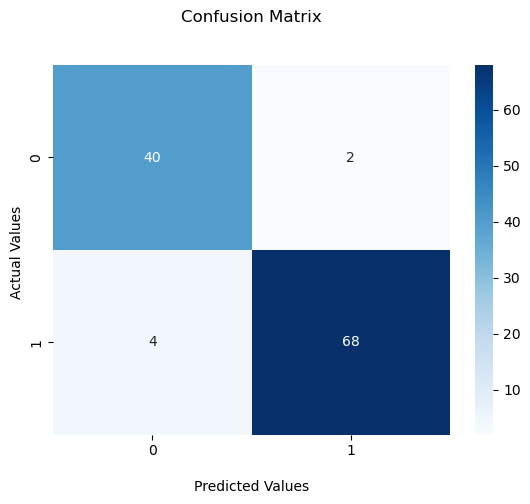

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        42
           1       0.97      0.94      0.96        72

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114

AUC-ROC: 0.9923941798941799


In [24]:
# Neural Network

# Data preparation

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42, stratify=y_train)

X_train_trans = data_preparation.fit_transform(X_train)
X_test_trans = data_preparation.transform(X_test)
X_val_trans = data_preparation.transform(X_val)

# Model

model_6 = tf.keras.Sequential()
model_6.add(Dense(200, activation='relu', input_dim=X_train_trans.shape[1]))
model_6.add(Dropout(0.2))
model_6.add(Dense(100, activation='relu'))
model_6.add(Dropout(0.2))
model_6.add(Dense(1, activation='sigmoid'))

model_6.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

es = EarlyStopping(patience=5, monitor='val_loss', restore_best_weights=True)
model_6.fit(X_train_trans, y_train, epochs=200, batch_size=32, callbacks=[es], validation_data=(X_val_trans, y_val))

# Evaluation

predictions = model_6.predict(X_test_trans)
predictions_binary = (predictions > 0.5).astype(int)

print("Confusion Matrix:")
conf_matrix(y_test, predictions_binary)

cr = classification_report(y_test, predictions_binary)
print("Classification Report:")
print(cr)

auc_roc = roc_auc_score(y_test, predictions)

print("AUC-ROC:", auc_roc)

